In [2]:
!pip install folium

^C


In [3]:
!pip install autoviz

In [1]:
import pandas as pd
import numpy as np
# from autoviz.classify_method import data_cleaning_suggestions

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
#import imputer:
from sklearn.impute import KNNImputer
#score
from sklearn.metrics import f1_score
from sklearn.ensemble import StackingClassifier

In [3]:
from autoviz.AutoViz_Class import AutoViz_Class


Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [98]:
df = pd.read_csv("C://Users/bxmaq/Downloads/startup dataset/startup data.csv")

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [100]:
df.drop(["Unnamed: 6"],axis=1, inplace=True)
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [101]:
comparison_column = np.where(df["state_code"] != df["state_code.1"], True, False)
df[comparison_column]['state_code.1']
df.drop(["state_code.1"], axis=1, inplace=True)

In [102]:
print(df.isnull().sum())


state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_games

In [103]:
df_filtered = df[df['closed_at'].isna()]

# Get the value counts of 'status' for the filtered rows
status_counts = df_filtered['status'].value_counts()

# Get the sum of the value counts
status_counts_sum = status_counts.sum()

print("Value counts of 'status' where 'closed_at' is null:")
print(status_counts)
print("\nSum of value counts:")
print(status_counts_sum)

Value counts of 'status' where 'closed_at' is null:
status
acquired    588
Name: count, dtype: int64

Sum of value counts:
588


In [104]:
df.drop(["closed_at"],axis=1, inplace=True)

In [105]:
numerical_column_names = ['age_first_milestone_year', 'age_last_milestone_year']

In [106]:
def imputing_numeric_missing_values(dataset,n_neighbors=10):
    numerical_column_names = df.select_dtypes([np.number]).columns
    knn= KNNImputer()
    knn_dataset= knn.fit_transform(df[numerical_column_names])
    
    dataset[numerical_column_names]=pd.DataFrame(knn_dataset)
    return dataset

df=imputing_numeric_missing_values(df)


# Check for Null values
print(df.isnull().sum())

state_code                  0
latitude                    0
longitude                   0
zip_code                    0
id                          0
city                        0
name                        0
labels                      0
founded_at                  0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommerce                0
is_biotech                  0
is_consult

In [107]:
def draw_heatmap(df):
    
    
    f, ax = plt.subplots(figsize = (18, 18))
    
    corrMatt = df.corr(method='spearman')
    
    sns.heatmap(corrMatt, annot = True, linewidth = 0.5, fmt = '.1f', ax = ax)
    plt.show()
    
    
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    
numerical_df_1=df.select_dtypes(numerics)

In [108]:
df

state_code  latitude    longitude zip_code    id         city       \
0       CA      42.358880  -71.056820   92101    c:6669      San Diego   
1       CA      37.238916 -121.973718   95032   c:16283      Los Gatos   
2       CA      32.901049 -117.192656   92121   c:65620      San Diego   
3       CA      37.320309 -122.050040   95014   c:42668      Cupertino   
4       CA      37.779281 -122.419236   94105   c:65806  San Francisco   
..         ...        ...         ...      ...      ...            ...   
918     CA      37.740594 -122.376471   94107   c:21343  San Francisco   
919     MA      42.504817  -71.195611    1803   c:41747     Burlington   
920     CA      37.408261 -122.015920   94089   c:31549      Sunnyvale   
921     CA      37.556732 -122.288378   94404   c:33198  San Francisco   
922     CA      37.386778 -121.966277   95054   c:26702    Santa Clara   

             name          labels founded_at first_funding_at last_funding_at  \
0             Bandsintown    1.0    1/1/2007      4/1/2009         1/1/2010     
1               TriCipher    1.0    1/1/2000     2/14/2005       12/28/2009     
2                   Plixi    1.0   3/18/2009     3/30/2010        3/30/2010     
3       Solidcore Systems    1.0    1/1/2002     2/17/2005        4/25/2007     
4          Inhale Digital    0.0    8/1/2010      8/1/2010         4/1/2012     
..                    ...     ...        ...              ...             ...   
918               CoTweet    1.0    1/1/2009      7/9/2009         7/9/2009     
919    Reef Point Systems    0.0    1/1/1998      4/1/2005        3/23/2007     
920       Paracor Medical    0.0    1/1/1999     6/29/2007        6/29/2007     
921               Causata    1.0    1/1/2009     10/5/2009        11/1/2011     
922  Asempra Technologies    1.0    1/1/2003     2/13/2006        2/13/2006     

     age_first_funding_year  age_last_funding_year  age_first_milestone_year  \
0            2.2493                 3.0027                   4.6685            
1            5.1260                 9.9973                   7.0055            
2            1.0329                 1.0329                   1.4575            
3            3.1315                 5.3151                   6.0027            
4            0.0000                 1.6685                   0.0384            
..                      ...                    ...                       ...   
918          0.5178                 0.5178                   0.5808            
919          7.2521                 9.2274                   6.0027            
920          8.4959                 8.4959                   9.0055            
921          0.7589                 2.8329                   0.7589            
922          3.1205                 3.1205                   4.0027            

     age_last_milestone_year  relationships  funding_rounds  \
0            6.7041                3.0             3.0        
1            7.0055                9.0             4.0        
2            2.2055                5.0             1.0        
3            6.0027                5.0             3.0        
4            0.0384                2.0             2.0        
..                       ...            ...             ...   
918          4.5260                9.0             1.0        
919          6.0027                1.0             3.0        
920          9.0055                5.0             1.0        
921          3.8356               12.0             2.0        
922          4.0027                4.0             1.0        

     funding_total_usd  milestones  is_CA  is_NY  is_MA  is_TX  is_otherstate  \
0         375000.0          3.0      1.0    0.0    0.0    0.0        0.0        
1       40100000.0          1.0      1.0    0.0    0.0    0.0        0.0        
2        2600000.0          2.0      1.0    0.0    0.0    0.0        0.0        
3       40000000.0          1.0      1.0    0.0    0.0    0.0        0.0        
4        1300000.0 

In [109]:
# Convert columns to datetime
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'])
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'])
df['founded_at'] = pd.to_datetime(df['founded_at'])

# Calculate the months between dates
df['months_between_first_and_last_funding'] = ((df['last_funding_at'] - df['first_funding_at']) / np.timedelta64(1, 'M'))
df['months_between_foundation_and_first_funding'] = ((df['first_funding_at'] - df['founded_at']) / np.timedelta64(1, 'M'))


In [110]:
df.drop(["last_funding_at"],axis=1, inplace=True)
df.drop(["first_funding_at"], axis=1, inplace=True)
df.drop(["founded_at"], axis=1, inplace=True)

In [111]:
std_deviation = 2
mean = df['avg_participants'].mean()
std = df['avg_participants'].std()

upper_threshold = mean + (std_deviation * std)
lower_threshold = mean - (std_deviation * std)
df = df[(df['avg_participants'] >= lower_threshold) & (df['avg_participants'] <= upper_threshold)]

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 879 entries, 0 to 922
Data columns (total 44 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   state_code                                   879 non-null    object 
 1   latitude                                     879 non-null    float64
 2   longitude                                    879 non-null    float64
 3   zip_code                                     879 non-null    object 
 4   id                                           879 non-null    object 
 5   city                                         879 non-null    object 
 6   name                                         879 non-null    object 
 7   labels                                       879 non-null    float64
 8   age_first_funding_year                       879 non-null    float64
 9   age_last_funding_year                        879 non-null    float64
 10  age_fir

In [113]:
df.rename(columns={'status':'is_acquired'}, inplace=True)

In [114]:
df['is_acquired'] = df['is_acquired'].map({'acquired': 1, 'closed': 0})


In [115]:
import folium 

latitude_initial = 39.8283
longitude_initial = -50.0000

map = folium.Map(location = [latitude_initial, longitude_initial], 
                  zoom_start = 3, tiles = 'cartodbpositron')


for index, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup = row['state_code']).add_to(map)

map

In [116]:
%matplotlib inline


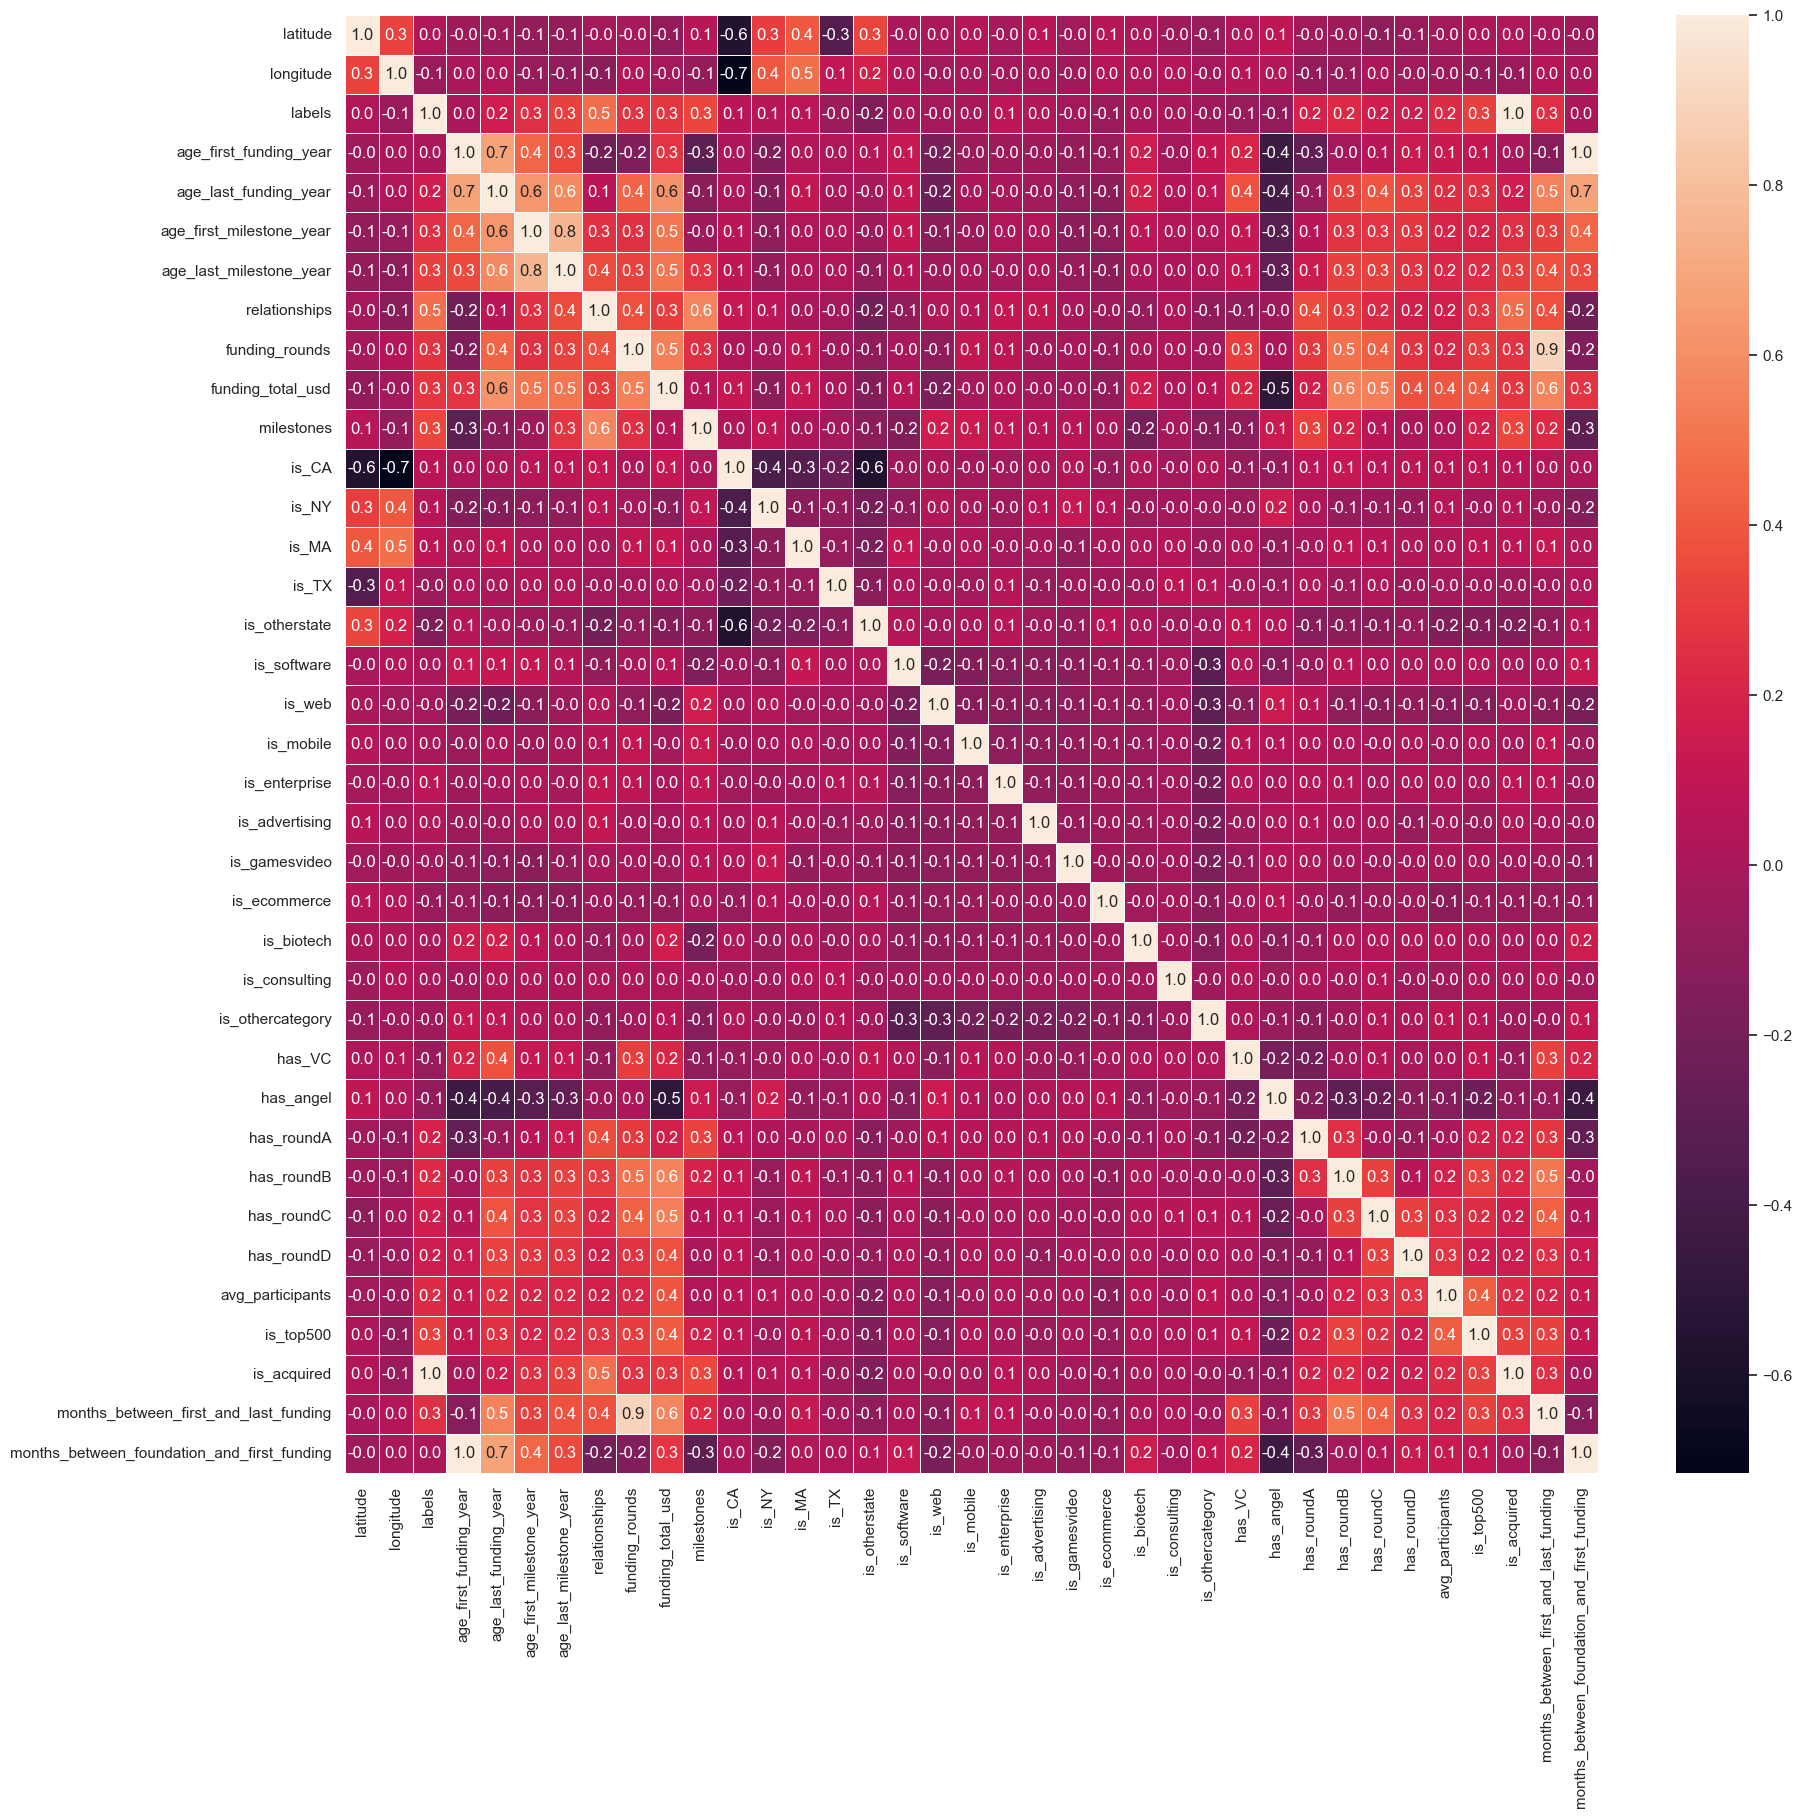

In [117]:
def draw_heatmap(df):
    
    
    f, ax = plt.subplots(figsize = (18, 18))
    
    corrMatt = df.corr(method='spearman')
    
    sns.heatmap(corrMatt, annot = True, linewidth = 0.5, fmt = '.1f', ax = ax)
    plt.show()
    
    
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    
numerical_df_1=df.select_dtypes(numerics)
numerical_column_names = df.select_dtypes(numerics).columns

draw_heatmap(numerical_df_1)
plt.show()

In [118]:
df['object_id'] = df['object_id'].astype(str)
df['id'] = df['id'].astype(str)



In [119]:
# Remove the "c:" prefix and convert to integer
df['object_id'] = df['object_id'].str.replace("c:", '', regex=False).astype(int)
df['id'] = df['id'].str.replace("c:", '', regex=False).astype(int)

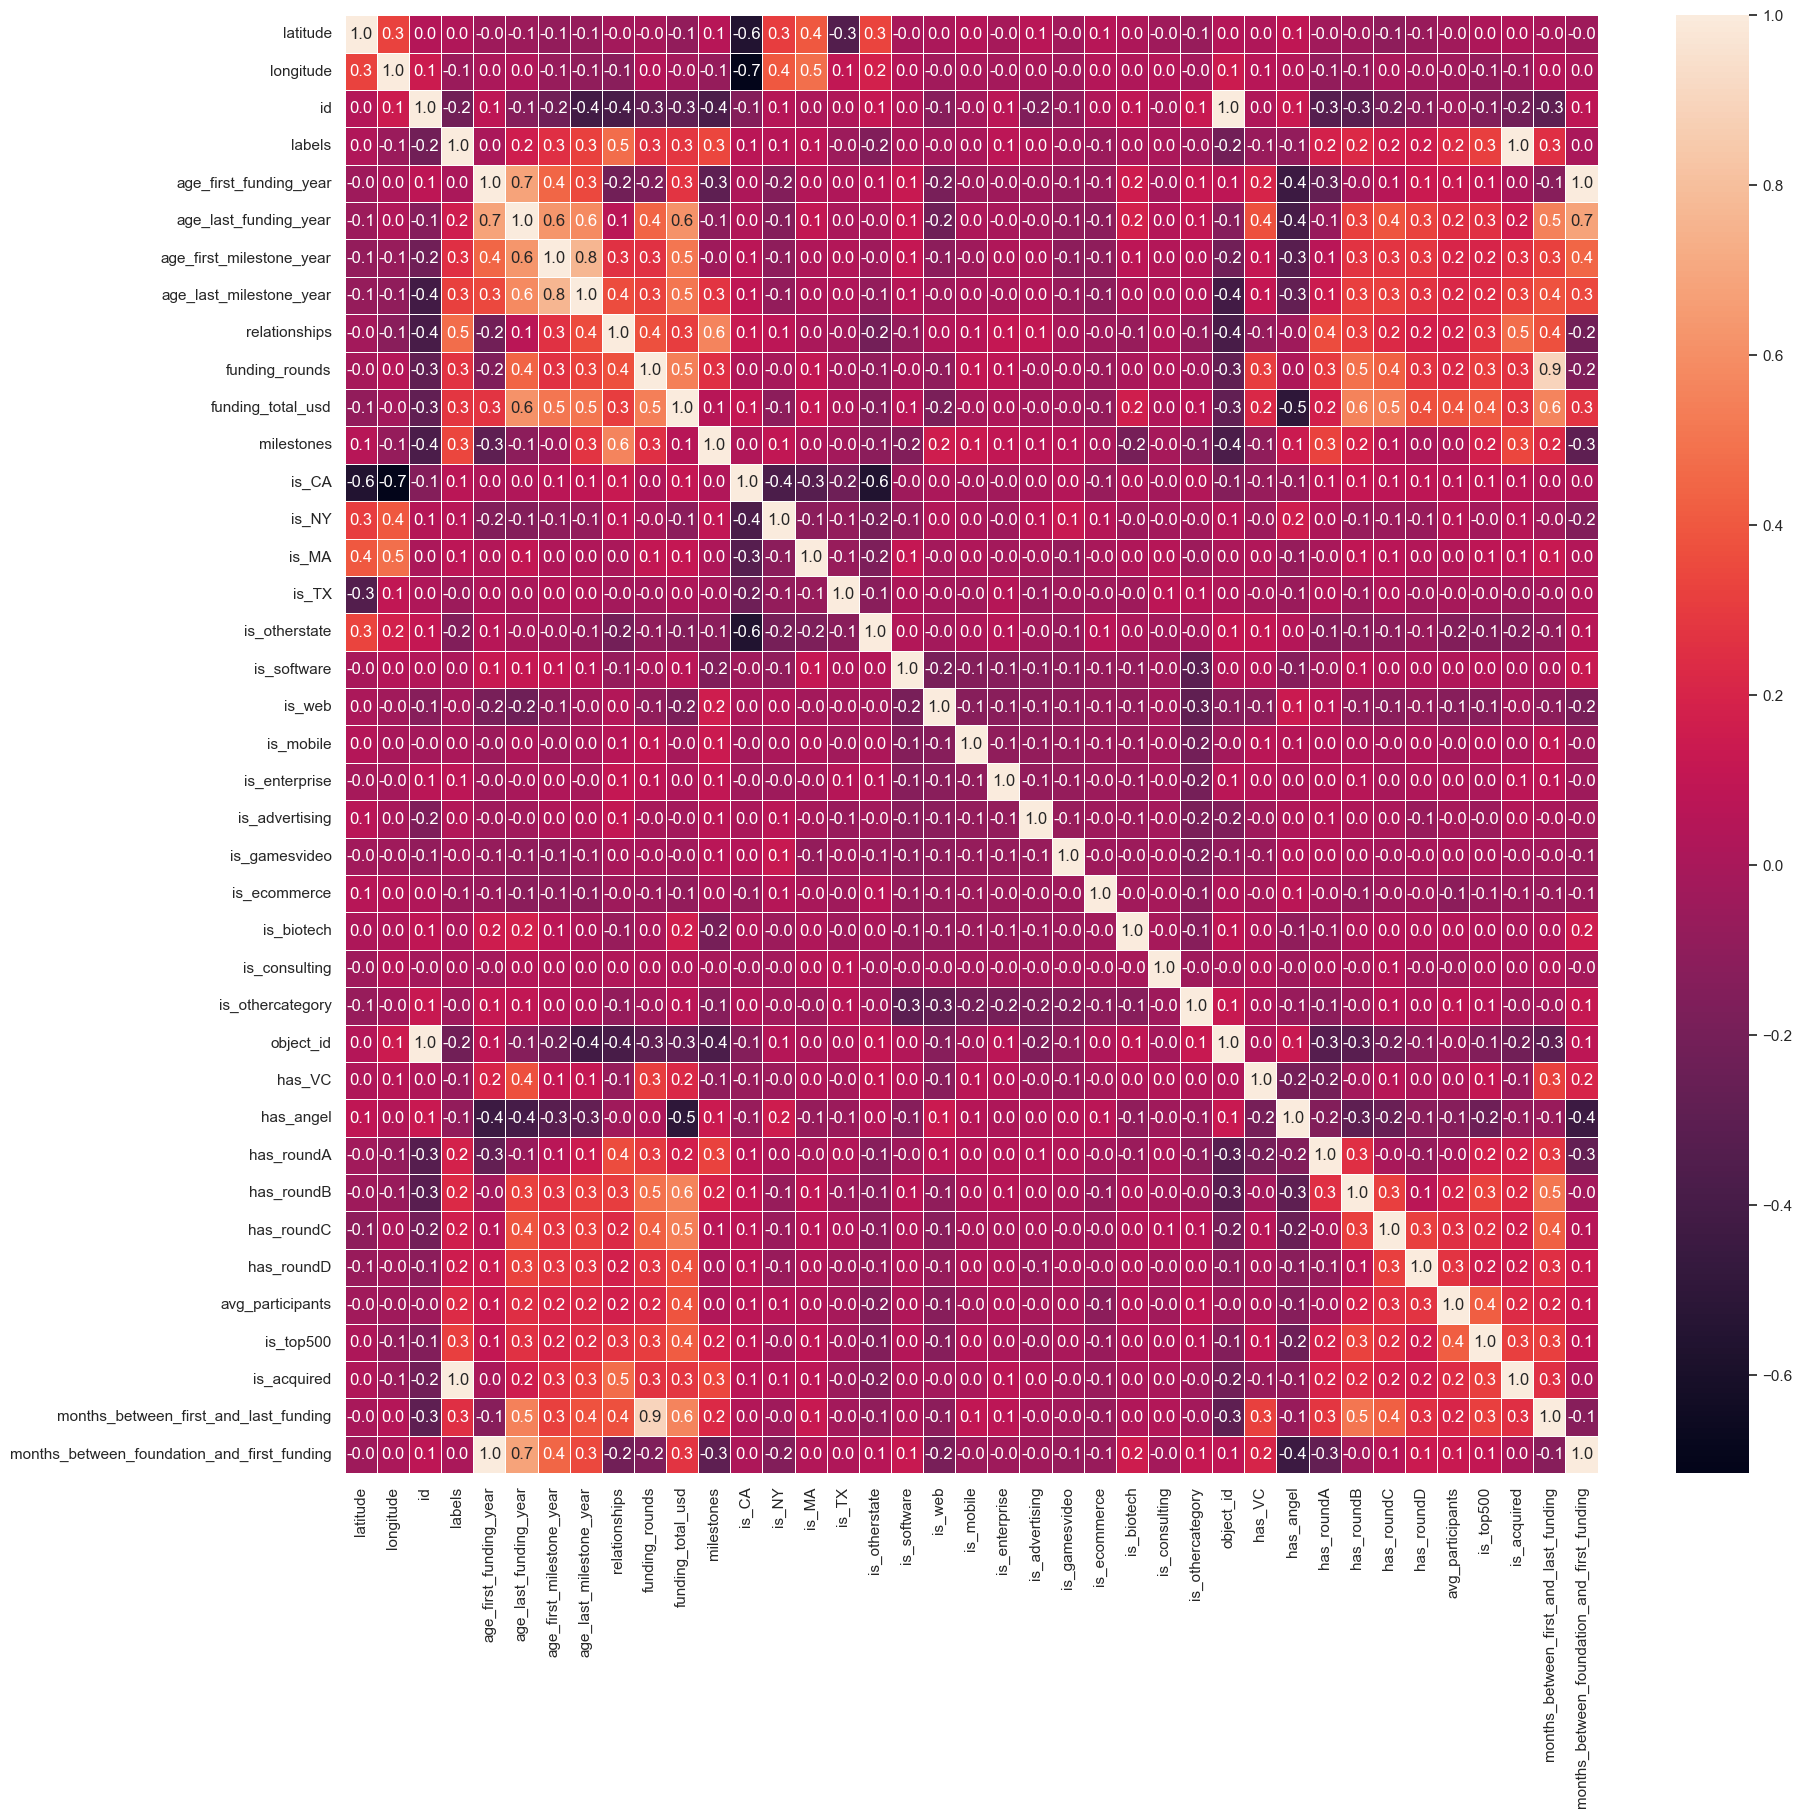

In [120]:
numerical_df_4=df.select_dtypes(numerics)
draw_heatmap(numerical_df_4)

# Create correlation matrix
corr_matrix = numerical_df_4.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.loc["is_acquired"]
upper=upper.fillna(0)
upper=upper.to_dict()
# Find features with correlation greater than 0.95
to_drop = [key for key in upper if upper[key]< 0.2]

In [121]:
print(to_drop)


['latitude', 'longitude', 'id', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'funding_total_usd', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting', 'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA', 'has_roundC', 'has_roundD', 'months_between_foundation_and_first_funding']


In [122]:
df.drop(to_drop, axis=1, inplace=True)
numeric_df=df.select_dtypes(numerics)
df.drop(["months_between_first_and_last_funding"], axis=1, inplace=True) #corelated to founding_rounds

In [123]:
df.drop(["labels"], axis=1, inplace=True)
# df.drop(["closed_at"], axis=1, inplace=True)

In [124]:
df.drop(["name"], axis=1, inplace=True)


In [125]:
df['zip_code'].nunique()

369

In [126]:
df['city'].nunique()

215

In [127]:
df.drop(["zip_code"], axis=1, inplace=True)


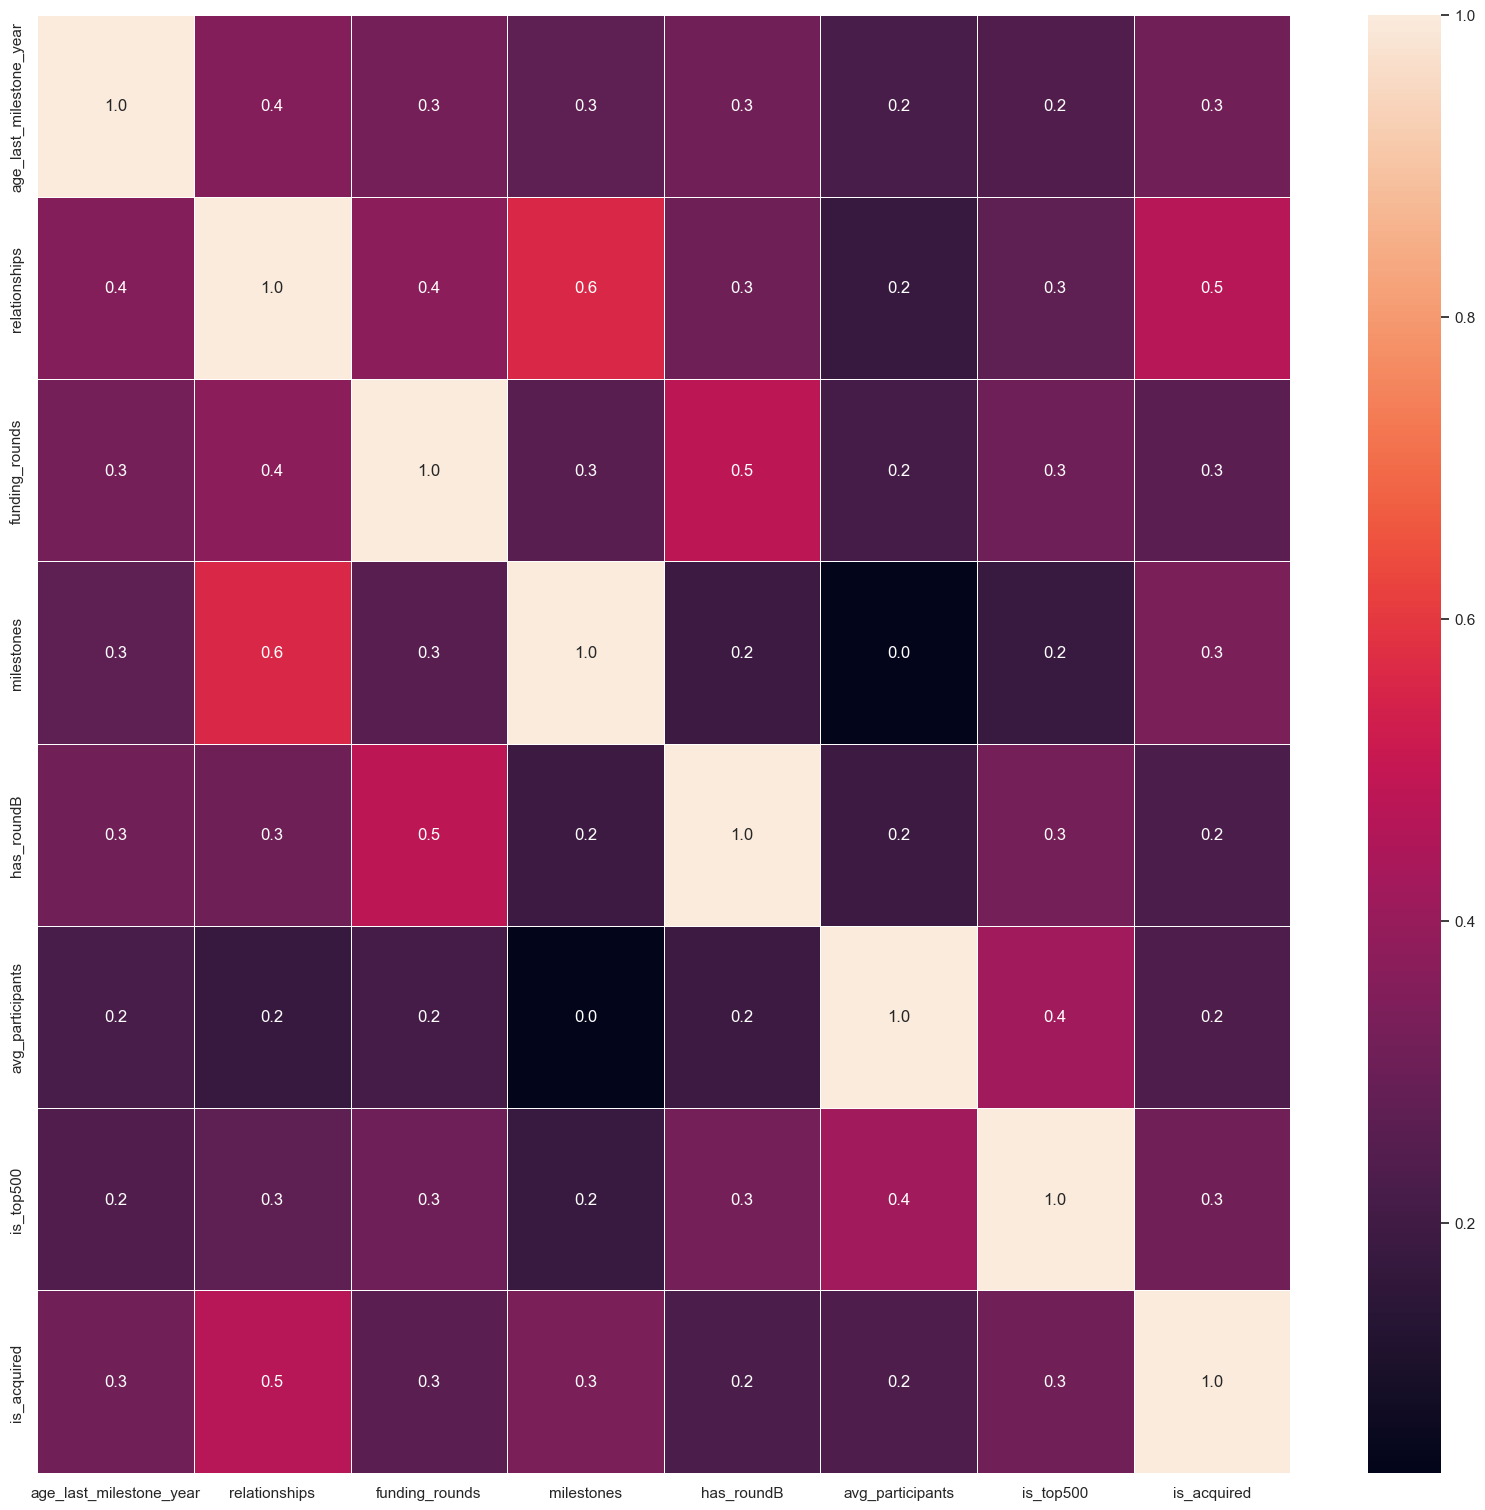

In [128]:
numeric_df=df.select_dtypes(numerics)
draw_heatmap(numeric_df)

plt.show()

In [129]:
df

state_code      city       age_last_milestone_year  relationships  \
0       CA          San Diego          6.7041                3.0        
1       CA          Los Gatos          7.0055                9.0        
2       CA          San Diego          2.2055                5.0        
3       CA          Cupertino          6.0027                5.0        
4       CA      San Francisco          0.0384                2.0        
..         ...            ...                      ...            ...   
917     WA            Bothell          8.7589                9.0        
918     CA      San Francisco          4.5260                9.0        
919     MA         Burlington          6.0027                1.0        
921     CA      San Francisco          3.8356               12.0        
922     CA        Santa Clara          4.0027                4.0        

     funding_rounds  milestones category_code  has_roundB  avg_participants  \
0          3.0           3.0            music      0.0          1.0000        
1          4.0           1.0       enterprise      1.0          4.7500        
2          1.0           2.0              web      0.0          4.0000        
3          3.0           1.0         software      1.0          3.3333        
4          2.0           1.0      games_video      0.0          1.0000        
..              ...         ...           ...         ...               ...   
917        5.0           2.0           mobile      0.0          5.6000        
918        1.0           2.0      advertising      0.0          6.0000        
919        3.0           1.0         security      1.0          2.6667        
921        2.0           2.0         software      1.0          1.0000        
922        1.0           1.0         security      1.0          3.0000        

     is_top500  is_acquired  
0       0.0          1       
1       1.0          1       
2       1.0          1       
3       1.0          1       
4       1.0          0       
..         ...          ...  
917     1.0          1       
918     1.0          1       
919     1.0          0       
921     1.0          1       
922     1.0          1       

[879 rows x 11 columns]

   category_code    Closed (%)  Acquired (%)
0      advertising   28.333333    71.666667 
1          biotech   33.333333    66.666667 
2       enterprise   23.611111    76.388889 
3      games_video   40.384615    59.615385 
4         hardware   59.259259    40.740741 
5           mobile   35.064935    64.935065 
6  network_hosting   30.303030    69.696970 
7    semiconductor   33.333333    66.666667 
8         software   34.228188    65.771812 
9              web   37.878788    62.121212 


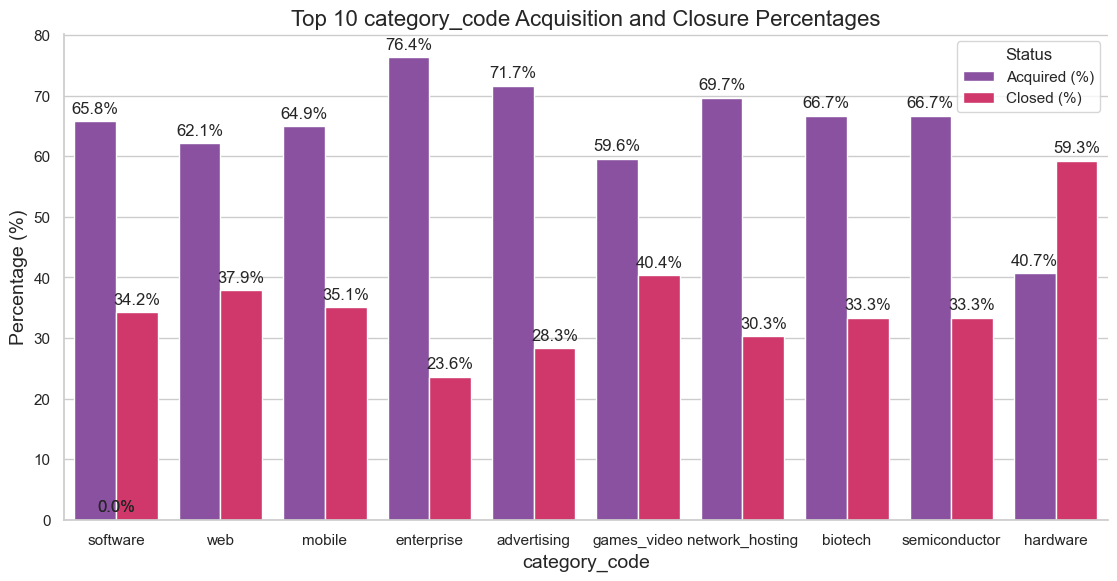

In [130]:

# Calculate the top 10 cities by count
top_cities = df['category_code'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 cities
df_top_cities = df[df['category_code'].isin(top_cities)]

# Calculate counts and percentages for the filtered DataFrame
city_status_counts = df_top_cities.groupby(['category_code', 'is_acquired']).size().unstack().fillna(0)
city_totals = city_status_counts.sum(axis=1)

# Calculate percentages
percentages = (city_status_counts.div(city_totals, axis=0) * 100).fillna(0)

# Create a DataFrame to display percentages for each city
percentage_df = percentages.reset_index()
percentage_df.columns.name = None  # Remove the columns name
percentage_df = percentage_df.rename(columns={True: 'Acquired (%)', False: 'Closed (%)'})

# Print the DataFrame with percentages
print(percentage_df)

# Melt the DataFrame for plotting
melted_df = percentage_df.melt(id_vars='category_code', value_vars=['Acquired (%)', 'Closed (%)'], 
                                var_name='Status', value_name='Percentage')

# Plotting the bar plot for visual representation
sns.set(style="whitegrid")
colors = sns.color_palette(["#8e44ad", "#e91e63"])  # Purple and pink shades

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=melted_df, x='category_code', y='Percentage', hue='Status', palette=colors, order=top_cities)

# Adding annotations for percentages
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.1f}%', 
                      (p.get_x() + p.get_width() / 2., height), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points')

# Set title and labels
plt.title('Top 10 category_code Acquisition and Closure Percentages', fontsize=16)
plt.xlabel('category_code', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)

# Removing the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()

   has_roundB  Closed (%)  Acquired (%)
0      0.0      44.656489    55.343511 
1      1.0      22.535211    77.464789 


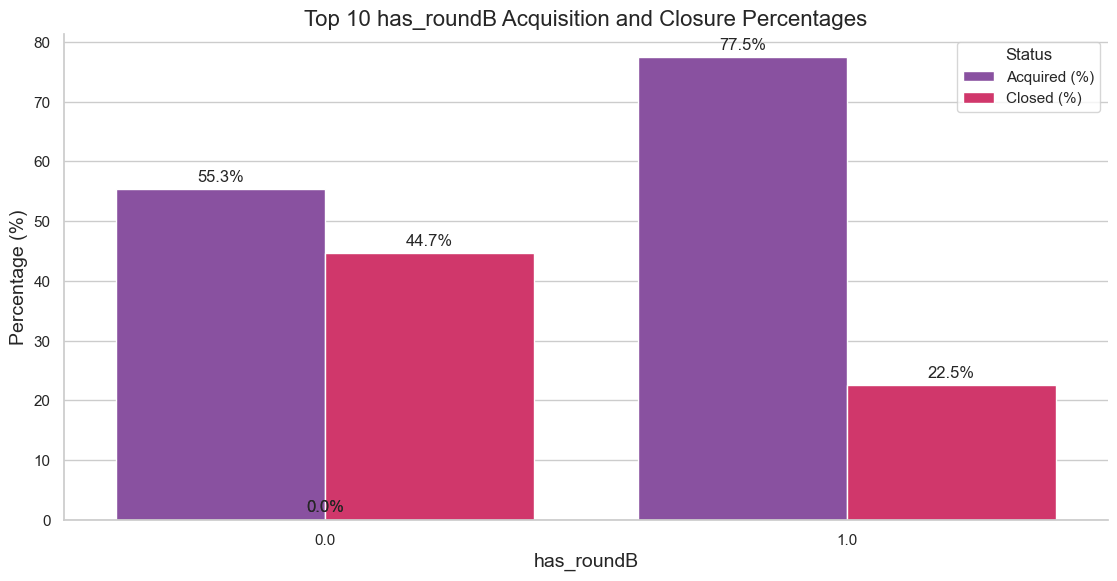

In [131]:

# Calculate the top 10 cities by count
top_cities = df['has_roundB'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 cities
df_top_cities = df[df['has_roundB'].isin(top_cities)]

# Calculate counts and percentages for the filtered DataFrame
city_status_counts = df_top_cities.groupby(['has_roundB', 'is_acquired']).size().unstack().fillna(0)
city_totals = city_status_counts.sum(axis=1)

# Calculate percentages
percentages = (city_status_counts.div(city_totals, axis=0) * 100).fillna(0)

# Create a DataFrame to display percentages for each city
percentage_df = percentages.reset_index()
percentage_df.columns.name = None  # Remove the columns name
percentage_df = percentage_df.rename(columns={True: 'Acquired (%)', False: 'Closed (%)'})

# Print the DataFrame with percentages
print(percentage_df)

# Melt the DataFrame for plotting
melted_df = percentage_df.melt(id_vars='has_roundB', value_vars=['Acquired (%)', 'Closed (%)'], 
                                var_name='Status', value_name='Percentage')

# Plotting the bar plot for visual representation
sns.set(style="whitegrid")
colors = sns.color_palette(["#8e44ad", "#e91e63"])  # Purple and pink shades

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=melted_df, x='has_roundB', y='Percentage', hue='Status', palette=colors, order=top_cities)

# Adding annotations for percentages
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.1f}%', 
                      (p.get_x() + p.get_width() / 2., height), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points')

# Set title and labels
plt.title('Top 10 has_roundB Acquisition and Closure Percentages', fontsize=16)
plt.xlabel('has_roundB', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)

# Removing the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()

   funding_rounds  Closed (%)  Acquired (%)
0        1.0        51.546392    48.453608 
1        2.0        37.313433    62.686567 
2        3.0        18.902439    81.097561 
3        4.0        19.101124    80.898876 
4        5.0        20.512821    79.487179 
5        6.0        15.384615    84.615385 
6        7.0        41.666667    58.333333 
7        8.0        50.000000    50.000000 
8       10.0         0.000000   100.000000 


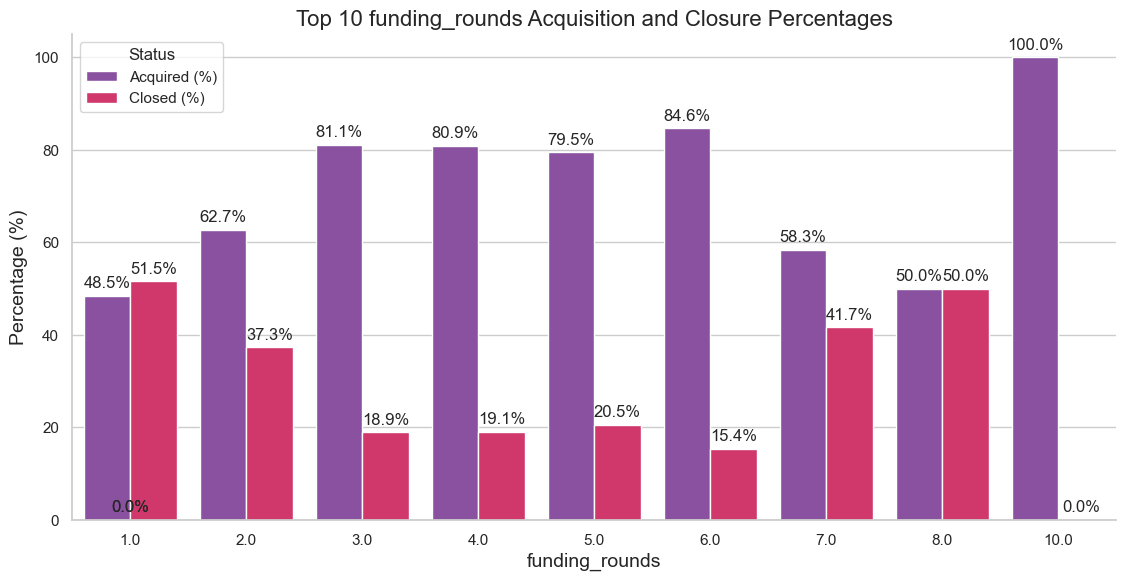

In [132]:

# Calculate the top 10 cities by count
top_cities = df['funding_rounds'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 cities
df_top_cities = df[df['funding_rounds'].isin(top_cities)]

# Calculate counts and percentages for the filtered DataFrame
city_status_counts = df_top_cities.groupby(['funding_rounds', 'is_acquired']).size().unstack().fillna(0)
city_totals = city_status_counts.sum(axis=1)

# Calculate percentages
percentages = (city_status_counts.div(city_totals, axis=0) * 100).fillna(0)

# Create a DataFrame to display percentages for each city
percentage_df = percentages.reset_index()
percentage_df.columns.name = None  # Remove the columns name
percentage_df = percentage_df.rename(columns={True: 'Acquired (%)', False: 'Closed (%)'})

# Print the DataFrame with percentages
print(percentage_df)

# Melt the DataFrame for plotting
melted_df = percentage_df.melt(id_vars='funding_rounds', value_vars=['Acquired (%)', 'Closed (%)'], 
                                var_name='Status', value_name='Percentage')

# Plotting the bar plot for visual representation
sns.set(style="whitegrid")
colors = sns.color_palette(["#8e44ad", "#e91e63"])  # Purple and pink shades

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=melted_df, x='funding_rounds', y='Percentage', hue='Status', palette=colors, order=top_cities)

# Adding annotations for percentages
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.1f}%', 
                      (p.get_x() + p.get_width() / 2., height), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points')

# Set title and labels
plt.title('Top 10 funding_rounds Acquisition and Closure Percentages', fontsize=16)
plt.xlabel('funding_rounds', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)

# Removing the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()

   age_last_milestone_year  Closed (%)  Acquired (%)
0          0.0000            89.473684    10.526316 
1          1.0000            40.000000    60.000000 
2          2.0000            25.000000    75.000000 
3          2.0027            33.333333    66.666667 
4          3.0000            14.285714    85.714286 
5          3.0027            16.666667    83.333333 
6          4.0027            25.000000    75.000000 
7          5.0027            25.000000    75.000000 
8          6.0027            27.272727    72.727273 
9          7.0055            22.222222    77.777778 


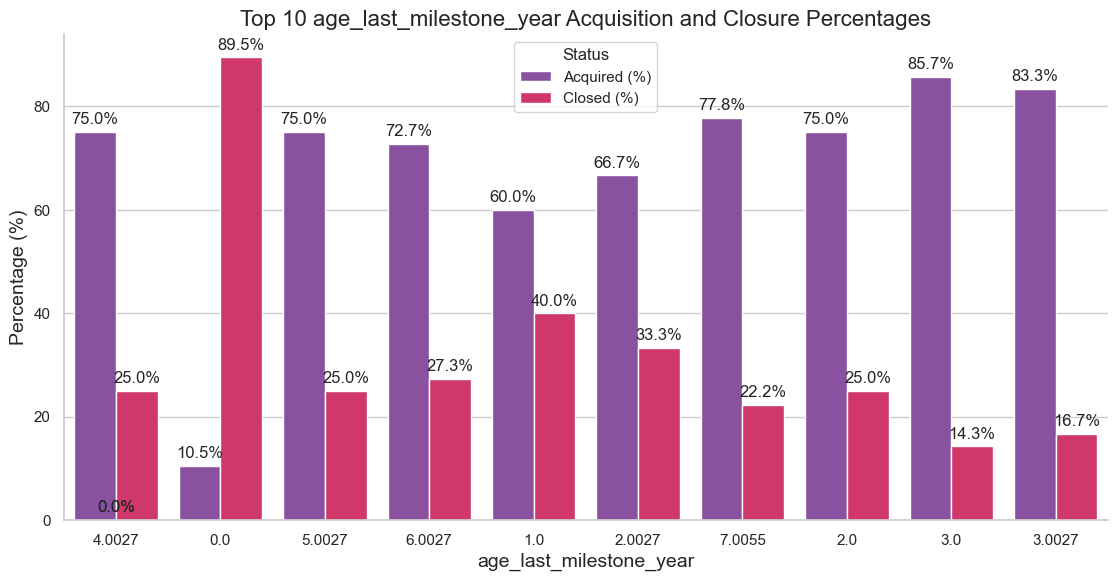

In [133]:

# Calculate the top 10 cities by count
top_cities = df['age_last_milestone_year'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 cities
df_top_cities = df[df['age_last_milestone_year'].isin(top_cities)]

# Calculate counts and percentages for the filtered DataFrame
city_status_counts = df_top_cities.groupby(['age_last_milestone_year', 'is_acquired']).size().unstack().fillna(0)
city_totals = city_status_counts.sum(axis=1)

# Calculate percentages
percentages = (city_status_counts.div(city_totals, axis=0) * 100).fillna(0)

# Create a DataFrame to display percentages for each city
percentage_df = percentages.reset_index()
percentage_df.columns.name = None  # Remove the columns name
percentage_df = percentage_df.rename(columns={True: 'Acquired (%)', False: 'Closed (%)'})

# Print the DataFrame with percentages
print(percentage_df)

# Melt the DataFrame for plotting
melted_df = percentage_df.melt(id_vars='age_last_milestone_year', value_vars=['Acquired (%)', 'Closed (%)'], 
                                var_name='Status', value_name='Percentage')

# Plotting the bar plot for visual representation
sns.set(style="whitegrid")
colors = sns.color_palette(["#8e44ad", "#e91e63"])  # Purple and pink shades

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=melted_df, x='age_last_milestone_year', y='Percentage', hue='Status', palette=colors, order=top_cities)

# Adding annotations for percentages
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.1f}%', 
                      (p.get_x() + p.get_width() / 2., height), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points')

# Set title and labels
plt.title('Top 10 age_last_milestone_year Acquisition and Closure Percentages', fontsize=16)
plt.xlabel('age_last_milestone_year', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)

# Removing the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()

   is_top500  Closed (%)  Acquired (%)
0     0.0      65.714286    34.285714 
1     1.0      28.267045    71.732955 


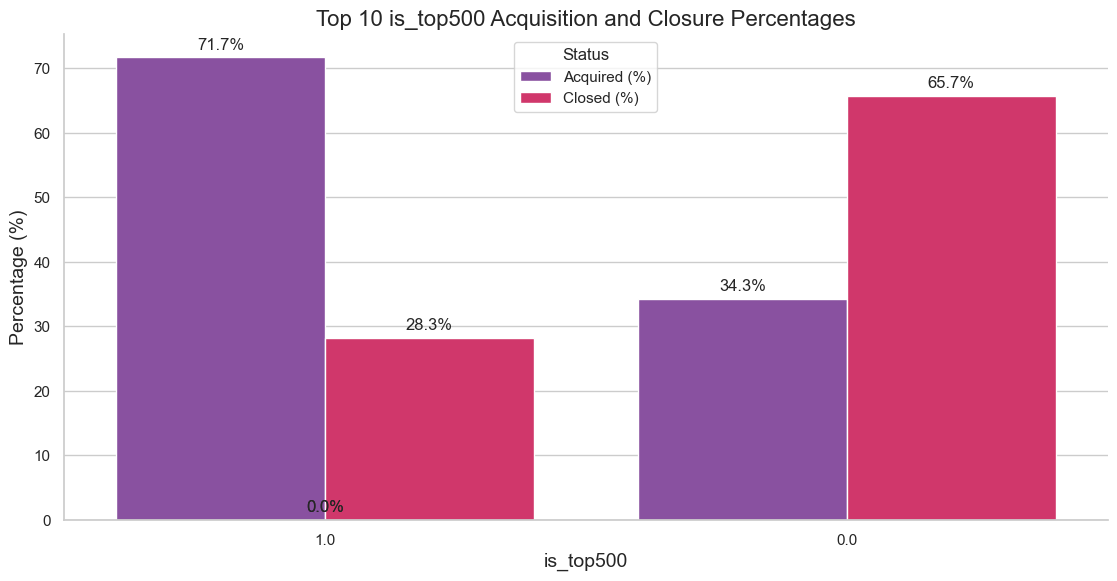

In [134]:

# Calculate the top 10 cities by count
top_cities = df['is_top500'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 cities
df_top_cities = df[df['is_top500'].isin(top_cities)]

# Calculate counts and percentages for the filtered DataFrame
city_status_counts = df_top_cities.groupby(['is_top500', 'is_acquired']).size().unstack().fillna(0)
city_totals = city_status_counts.sum(axis=1)

# Calculate percentages
percentages = (city_status_counts.div(city_totals, axis=0) * 100).fillna(0)

# Create a DataFrame to display percentages for each city
percentage_df = percentages.reset_index()
percentage_df.columns.name = None  # Remove the columns name
percentage_df = percentage_df.rename(columns={True: 'Acquired (%)', False: 'Closed (%)'})

# Print the DataFrame with percentages
print(percentage_df)

# Melt the DataFrame for plotting
melted_df = percentage_df.melt(id_vars='is_top500', value_vars=['Acquired (%)', 'Closed (%)'], 
                                var_name='Status', value_name='Percentage')

# Plotting the bar plot for visual representation
sns.set(style="whitegrid")
colors = sns.color_palette(["#8e44ad", "#e91e63"])  # Purple and pink shades

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=melted_df, x='is_top500', y='Percentage', hue='Status', palette=colors, order=top_cities)

# Adding annotations for percentages
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.1f}%', 
                      (p.get_x() + p.get_width() / 2., height), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points')

# Set title and labels
plt.title('Top 10 is_top500 Acquisition and Closure Percentages', fontsize=16)
plt.xlabel('is_top500', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)

# Removing the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()

   relationships  Closed (%)  Acquired (%)
0       1.0        75.409836    24.590164 
1       2.0        72.727273    27.272727 
2       3.0        50.515464    49.484536 
3       4.0        31.764706    68.235294 
4       5.0        29.347826    70.652174 
5       6.0        27.272727    72.727273 
6       7.0        29.268293    70.731707 
7       8.0        30.769231    69.230769 
8       9.0        14.634146    85.365854 
9      10.0        15.000000    85.000000 


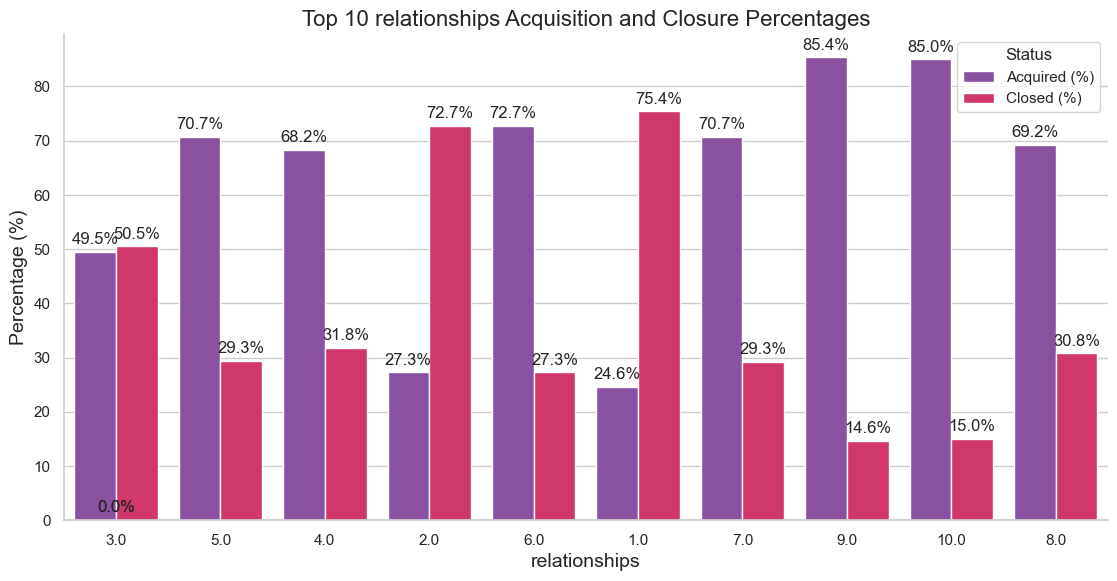

In [135]:

# Calculate the top 10 cities by count
top_cities = df['relationships'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 cities
df_top_cities = df[df['relationships'].isin(top_cities)]

# Calculate counts and percentages for the filtered DataFrame
city_status_counts = df_top_cities.groupby(['relationships', 'is_acquired']).size().unstack().fillna(0)
city_totals = city_status_counts.sum(axis=1)

# Calculate percentages
percentages = (city_status_counts.div(city_totals, axis=0) * 100).fillna(0)

# Create a DataFrame to display percentages for each city
percentage_df = percentages.reset_index()
percentage_df.columns.name = None  # Remove the columns name
percentage_df = percentage_df.rename(columns={True: 'Acquired (%)', False: 'Closed (%)'})

# Print the DataFrame with percentages
print(percentage_df)

# Melt the DataFrame for plotting
melted_df = percentage_df.melt(id_vars='relationships', value_vars=['Acquired (%)', 'Closed (%)'], 
                                var_name='Status', value_name='Percentage')

# Plotting the bar plot for visual representation
sns.set(style="whitegrid")
colors = sns.color_palette(["#8e44ad", "#e91e63"])  # Purple and pink shades

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=melted_df, x='relationships', y='Percentage', hue='Status', palette=colors, order=top_cities)

# Adding annotations for percentages
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.1f}%', 
                      (p.get_x() + p.get_width() / 2., height), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points')

# Set title and labels
plt.title('Top 10 relationships Acquisition and Closure Percentages', fontsize=16)
plt.xlabel('relationships', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)

# Removing the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()

   milestones  Closed (%)  Acquired (%)
0      0.0      69.178082    30.821918 
1      1.0      40.909091    59.090909 
2      2.0      28.448276    71.551724 
3      3.0      19.642857    80.357143 
4      4.0      19.672131    80.327869 
5      5.0       8.695652    91.304348 
6      6.0      16.666667    83.333333 
7      8.0       0.000000   100.000000 


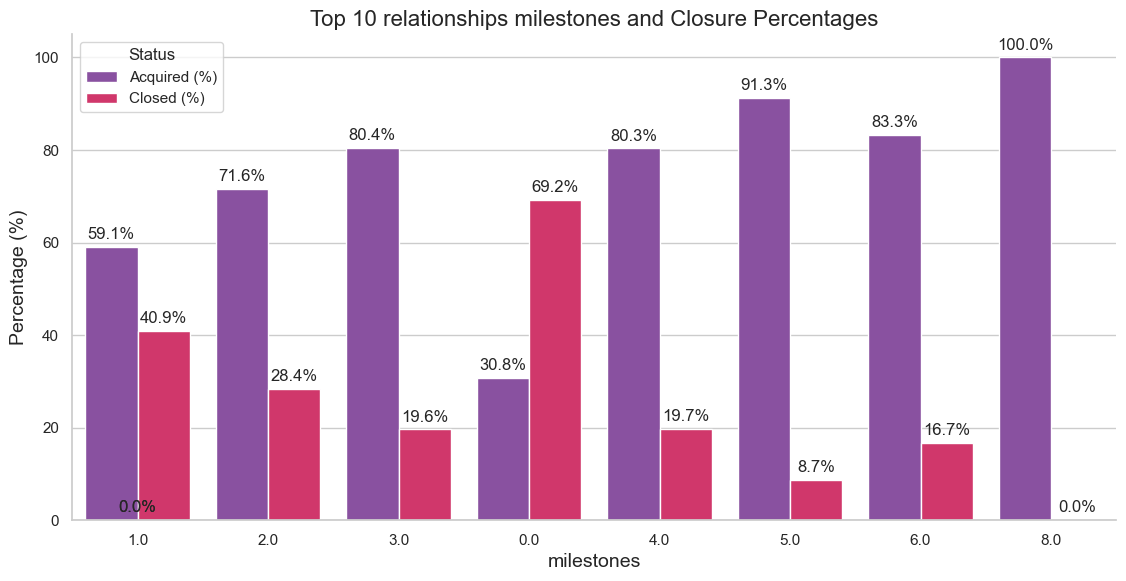

In [136]:

# Calculate the top 10 cities by count
top_cities = df['milestones'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 cities
df_top_cities = df[df['milestones'].isin(top_cities)]

# Calculate counts and percentages for the filtered DataFrame
city_status_counts = df_top_cities.groupby(['milestones', 'is_acquired']).size().unstack().fillna(0)
city_totals = city_status_counts.sum(axis=1)

# Calculate percentages
percentages = (city_status_counts.div(city_totals, axis=0) * 100).fillna(0)

# Create a DataFrame to display percentages for each city
percentage_df = percentages.reset_index()
percentage_df.columns.name = None  # Remove the columns name
percentage_df = percentage_df.rename(columns={True: 'Acquired (%)', False: 'Closed (%)'})

# Print the DataFrame with percentages
print(percentage_df)

# Melt the DataFrame for plotting
melted_df = percentage_df.melt(id_vars='milestones', value_vars=['Acquired (%)', 'Closed (%)'], 
                                var_name='Status', value_name='Percentage')

# Plotting the bar plot for visual representation
sns.set(style="whitegrid")
colors = sns.color_palette(["#8e44ad", "#e91e63"])  # Purple and pink shades

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=melted_df, x='milestones', y='Percentage', hue='Status', palette=colors, order=top_cities)

# Adding annotations for percentages
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.1f}%', 
                      (p.get_x() + p.get_width() / 2., height), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points')

# Set title and labels
plt.title('Top 10 relationships milestones and Closure Percentages', fontsize=16)
plt.xlabel('milestones', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)

# Removing the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()

   milestones  Closed (%)  Acquired (%)
0      0.0      69.178082    30.821918 
1      1.0      40.909091    59.090909 
2      2.0      28.448276    71.551724 
3      3.0      19.642857    80.357143 
4      4.0      19.672131    80.327869 
5      5.0       8.695652    91.304348 
6      6.0      16.666667    83.333333 
7      8.0       0.000000   100.000000 


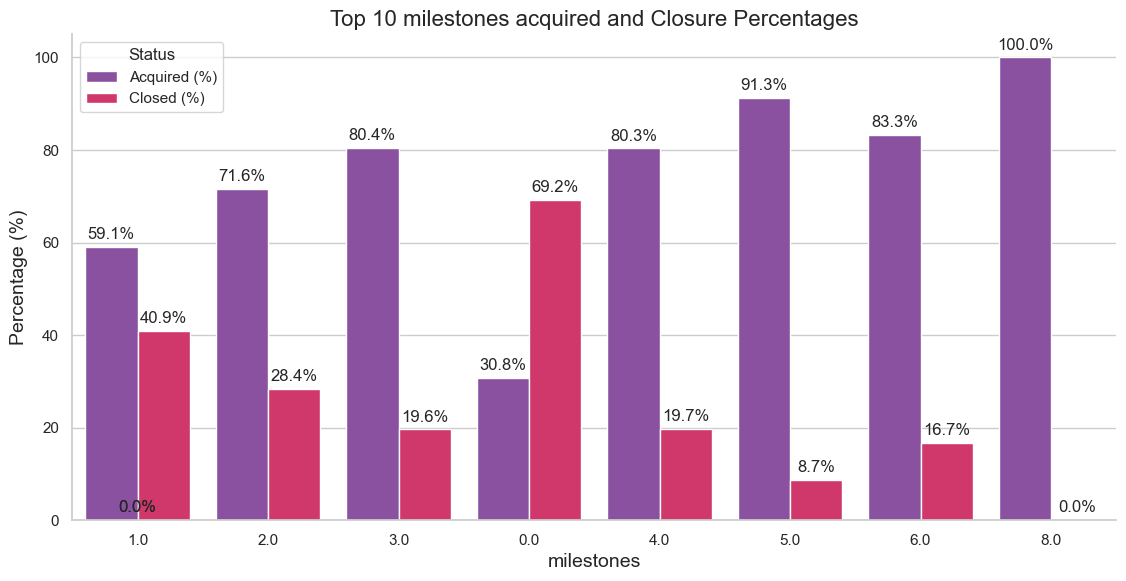

In [137]:

# Calculate the top 10 cities by count
top_cities = df['milestones'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 cities
df_top_cities = df[df['milestones'].isin(top_cities)]

# Calculate counts and percentages for the filtered DataFrame
city_status_counts = df_top_cities.groupby(['milestones', 'is_acquired']).size().unstack().fillna(0)
city_totals = city_status_counts.sum(axis=1)

# Calculate percentages
percentages = (city_status_counts.div(city_totals, axis=0) * 100).fillna(0)

# Create a DataFrame to display percentages for each city
percentage_df = percentages.reset_index()
percentage_df.columns.name = None  # Remove the columns name
percentage_df = percentage_df.rename(columns={True: 'Acquired (%)', False: 'Closed (%)'})

# Print the DataFrame with percentages
print(percentage_df)

# Melt the DataFrame for plotting
melted_df = percentage_df.melt(id_vars='milestones', value_vars=['Acquired (%)', 'Closed (%)'], 
                                var_name='Status', value_name='Percentage')

# Plotting the bar plot for visual representation
sns.set(style="whitegrid")
colors = sns.color_palette(["#8e44ad", "#e91e63"])  # Purple and pink shades

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=melted_df, x='milestones', y='Percentage', hue='Status', palette=colors, order=top_cities)

# Adding annotations for percentages
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.1f}%', 
                      (p.get_x() + p.get_width() / 2., height), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points')

# Set title and labels
plt.title('Top 10 milestones acquired and Closure Percentages', fontsize=16)
plt.xlabel('milestones', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)

# Removing the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()

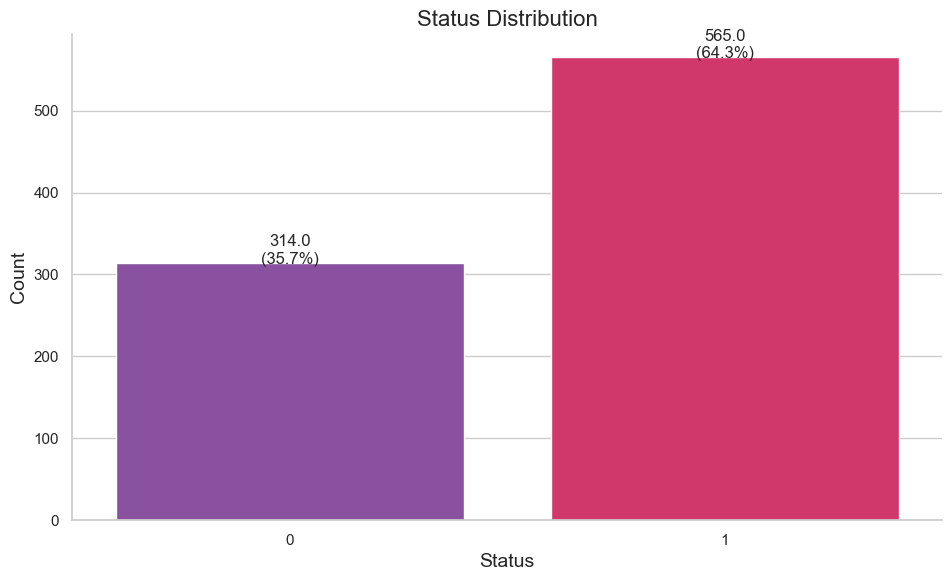

In [138]:
status_counts = df['is_acquired'].value_counts()
total_count = status_counts.sum()
percentages = (status_counts / total_count) * 100

# Set the style and custom color palette
sns.set(style="whitegrid")
colors = sns.color_palette(["#8e44ad", "#e91e63", "#9b59b6"])  # Purple and pink shades

# Plotting the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.countplot(data=df, x='is_acquired', palette=colors)

# Adding annotations for count and percentage
for p in bar_plot.patches:
    count = p.get_height()
    percentage = (count / total_count) * 100
    bar_plot.annotate(f'{count}\n({percentage:.1f}%)', 
                      (p.get_x() + p.get_width() / 2., count), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points')

# Set title and labels
plt.title('Status Distribution', fontsize=16)
plt.xlabel('Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Removing the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()

In [159]:

# Calculate the top 10 cities by count
top_cities = df['city'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 cities
df_top_cities = df[df['city'].isin(top_cities)]

# Calculate counts and percentages for the filtered DataFrame
city_status_counts = df_top_cities.groupby(['city', 'is_acquired']).size().unstack().fillna(0)
city_totals = city_status_counts.sum(axis=1)

# Calculate percentages
percentages = (city_status_counts.div(city_totals, axis=0) * 100).fillna(0)

# Create a DataFrame to display percentages for each city
percentage_df = percentages.reset_index()
percentage_df.columns.name = None  # Remove the columns name
percentage_df = percentage_df.rename(columns={True: 'Acquired (%)', False: 'Closed (%)'})

# Print the DataFrame with percentages
print(percentage_df)

# Melt the DataFrame for plotting
melted_df = percentage_df.melt(id_vars='city', value_vars=['Acquired (%)', 'Closed (%)'], 
                                var_name='Status', value_name='Percentage')

# Plotting the bar plot for visual representation
sns.set(style="whitegrid")
colors = sns.color_palette(["#8e44ad", "#e91e63"])  # Purple and pink shades

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=melted_df, x='city', y='Percentage', hue='Status', palette=colors, order=top_cities)

# Adding annotations for percentages
for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(f'{height:.1f}%', 
                      (p.get_x() + p.get_width() / 2., height), 
                      ha='center', va='center', 
                      xytext=(0, 9), 
                      textcoords='offset points')

# Set title and labels
plt.title('Top 10 Cities Acquisition and Closure Percentages', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)

# Removing the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()

KeyError: 'city'

In [ ]:
df=pd.get_dummies(df)

In [141]:
df

age_last_milestone_year  relationships  funding_rounds  milestones  \
0            6.7041                3.0             3.0           3.0      
1            7.0055                9.0             4.0           1.0      
2            2.2055                5.0             1.0           2.0      
3            6.0027                5.0             3.0           1.0      
4            0.0384                2.0             2.0           1.0      
..                       ...            ...             ...         ...   
917          8.7589                9.0             5.0           2.0      
918          4.5260                9.0             1.0           2.0      
919          6.0027                1.0             3.0           1.0      
921          3.8356               12.0             2.0           2.0      
922          4.0027                4.0             1.0           1.0      

     has_roundB  avg_participants  is_top500  is_acquired  state_code_AR  \
0        0.0          1.0000          0.0          1           False       
1        1.0          4.7500          1.0          1           False       
2        0.0          4.0000          1.0          1           False       
3        1.0          3.3333          1.0          1           False       
4        0.0          1.0000          1.0          0           False       
..          ...               ...        ...          ...            ...   
917      0.0          5.6000          1.0          1           False       
918      0.0          6.0000          1.0          1           False       
919      1.0          2.6667          1.0          0           False       
921      1.0          1.0000          1.0          1           False       
922      1.0          3.0000          1.0          1           False       

     state_code_AZ  state_code_CA  state_code_CO  state_code_CT  \
0        False           True          False          False       
1        False           True          False          False       
2        False           True          False          False       
3        False           True          False          False       
4        False           True          False          False       
..             ...            ...            ...            ...   
917      False          False          False          False       
918      False           True          False          False       
919      False          False          False          False       
921      False           True          False          False       
922      False           True          False          False       

     state_code_DC  state_code_FL  state_code_GA  state_code_ID  \
0        False          False          False          False       
1        False          False          False          False       
2        False          False          False          False       
3        False          False          False          False       
4        False          False          False          False       
..             ...            ...            ...            ...   
917      False          False          False          False       
918      False          False          False          False       
919      False          False          False          False       
921      False          False          False          False       
922      False          False          False          False       

     state_code_IL  state_code_IN  state_code_KY  state_code_MA  \
0        False          False          False          False       
1        False          False          False          False       
2        False          False          False          False       
3        False          False          False          False       
4        False          False          False          False       
..             ...            ...            ...            ...   
917      False          False          False          False       
918      False          False          False 

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Assuming df is already defined and properly loaded
y = df["is_acquired"]
X = df.loc[:, df.columns != 'is_acquired']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cross validate model with Kfold stratified cross-validation
kfold = StratifiedKFold(n_splits=10)

# Modeling step: Test different algorithms
random_state = 2
classifiers = [
    SVC(random_state=random_state),
    DecisionTreeClassifier(random_state=random_state),
    AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state), random_state=random_state, learning_rate=0.1),
    RandomForestClassifier(random_state=random_state),
    ExtraTreesClassifier(random_state=random_state),
    GradientBoostingClassifier(random_state=random_state),
    MLPClassifier(random_state=random_state),
    KNeighborsClassifier(),
    LogisticRegression(random_state=random_state),
    LinearDiscriminantAnalysis()
]

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y=y_train, scoring="accuracy", cv=kfold, n_jobs=-1))

cv_means = [result.mean() for result in cv_results]
cv_std = [result.std() for result in cv_results]

cv_res = pd.DataFrame({
    "CrossValMeans": cv_means,
    "CrossValErrors": cv_std,
    "Algorithm": [
        "SVC", "DecisionTree", "AdaBoost", "RandomForest", "ExtraTrees",
        "GradientBoosting", "MLP", "KNeighbors", "LogisticRegression", "LDA"
    ]
})

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bxmaq\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bxmaq\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bxmaq\anaconda3\Lib\site-packages\sklearn\svm\_base.py", line 190, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bxmaq\anaconda3\Lib\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\bxmaq\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1263, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\bxmaq\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 1049, in check_array
    _assert_all_finite(
  File "C:\Users\bxmaq\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 126, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "C:\Users\bxmaq\anaconda3\Lib\site-packages\sklearn\utils\validation.py", line 175, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
SVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [ ]:

# Plotting the results
plt.figure(figsize=(12, 8))
g = sns.barplot(data=cv_res, y="Algorithm", x="CrossValMeans", palette="Set3", ci=None)  # ci=None to remove built-in error bars

# Adding error bars manually and labels
for i, row in cv_res.iterrows():
    plt.errorbar(row["CrossValMeans"], i, xerr=row["CrossValErrors"], fmt='o', color='black')
    # Annotate with the mean accuracy value
    plt.text(row["CrossValMeans"] + row["CrossValErrors"], i, f'{row["CrossValMeans"]:.2f}', 
             va='center', ha='left', fontsize=12, color='black')

g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")
plt.show()

In [73]:
best_classifiers=[]

# ### SVC classifier
# SVMC = SVC(probability=True)
# svc_param_grid = {'kernel': ['rbf'], 
#                   'gamma': [ 0.001, 0.01, 0.1, 1],
#                   'C': [1, 10, 50, 100,200,300, 1000]}

# gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

# gsSVMC.fit(X_train,y_train)

# SVMC_best = gsSVMC.best_estimator_

# best_classifiers.append(SVMC_best)

# # Best score
# SVC_score = gsSVMC.best_score_

# print(f' SVC classifier score is :{SVC_score}')


# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [1,2,4],
              "max_features": [1, 10,100,1000],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_
best_classifiers.append(RFC_best)

# Best score

RandomForests_score= gsRFC.best_score_

print(f' RandomForests score is :{RandomForests_score}')

# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,1000],
              'learning_rate': [0.001,0.1, 0.05, 0.01,1,10],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_
best_classifiers.append(GBC_best)

# Best score

GradientBoosting_score= gsGBC.best_score_

print(f' GradientBoosting score is :{GradientBoosting_score}')

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


KeyboardInterrupt: 

In [68]:
def plotly_scatterplots(model_importances,model_title):
    trace = go.Scatter(
        y = feature_dataframe[model_importances].values,
        x = feature_dataframe['features'].values,
        mode='markers',
        marker=dict(
            sizemode = 'diameter',
            sizeref = 1,
            size = 25,
    #       size= feature_dataframe['AdaBoost feature importances'].values,
            #color = np.random.randn(500), #set color equal to a variable
            color = feature_dataframe[model_importances].values,
            colorscale='Portland',
            showscale=True
        ),
        text = feature_dataframe['features'].values
    )
    data = [trace]

    layout= go.Layout(
        autosize= True,
        title= model_title,
        hovermode= 'closest',
    #     xaxis= dict(
    #         title= 'Pop',
    #         ticklen= 5,
    #         zeroline= False,
    #         gridwidth= 2,
    #     ),
        yaxis=dict(
            title= 'Feature Importance',
            ticklen= 5,
            gridwidth= 2
        ),
        showlegend= False
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig,filename='scatter2010')

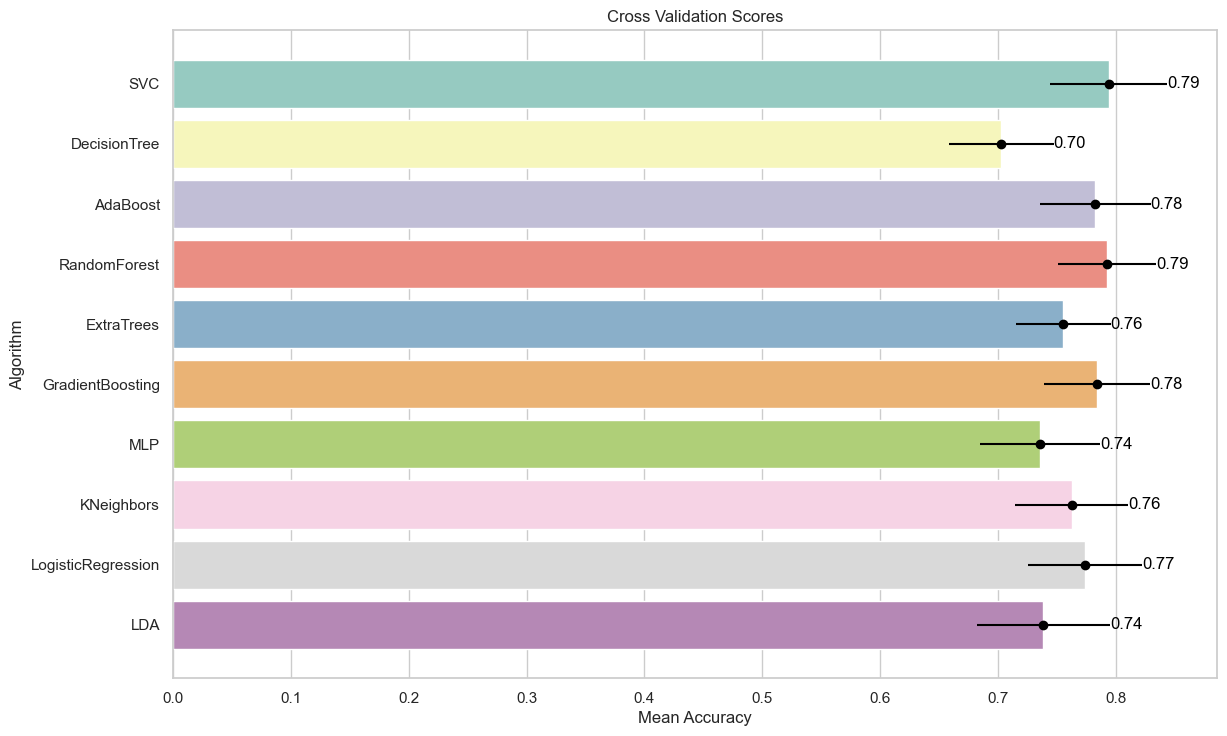

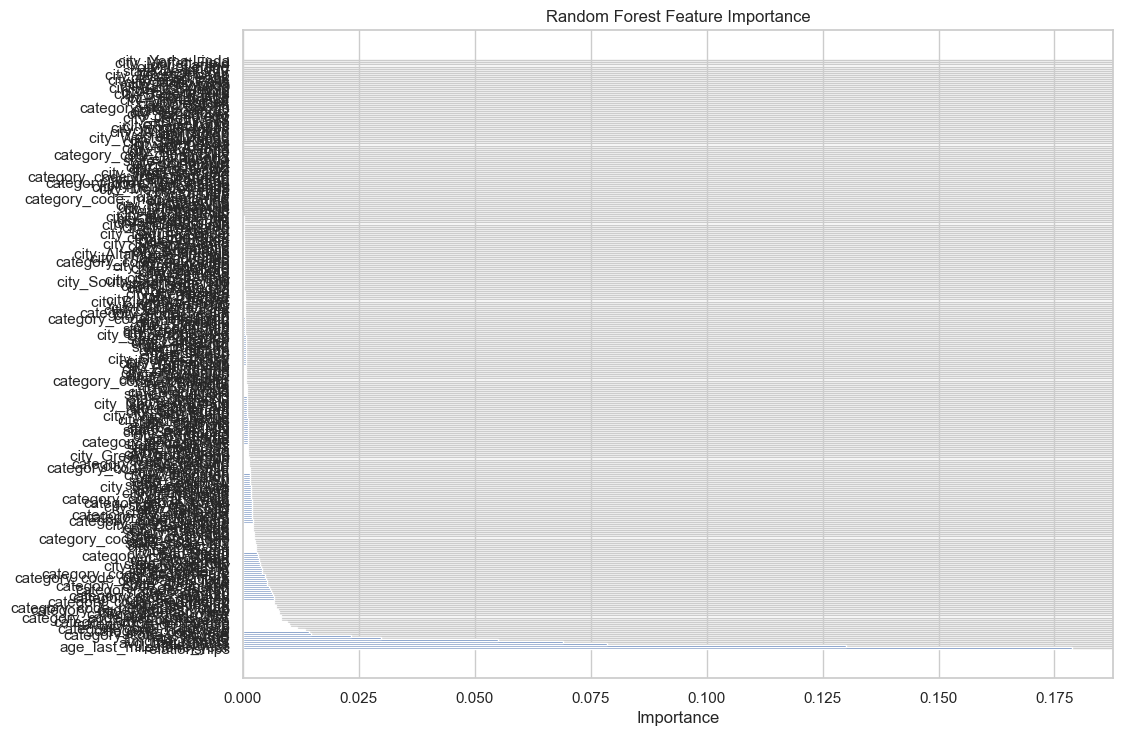

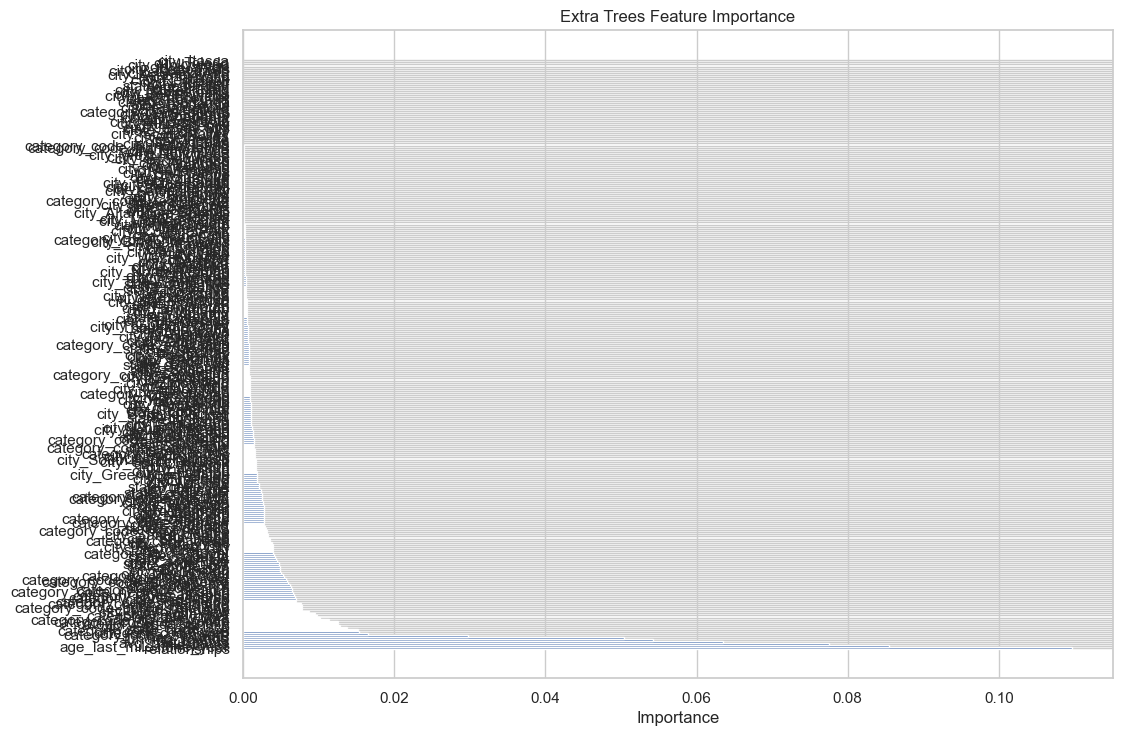

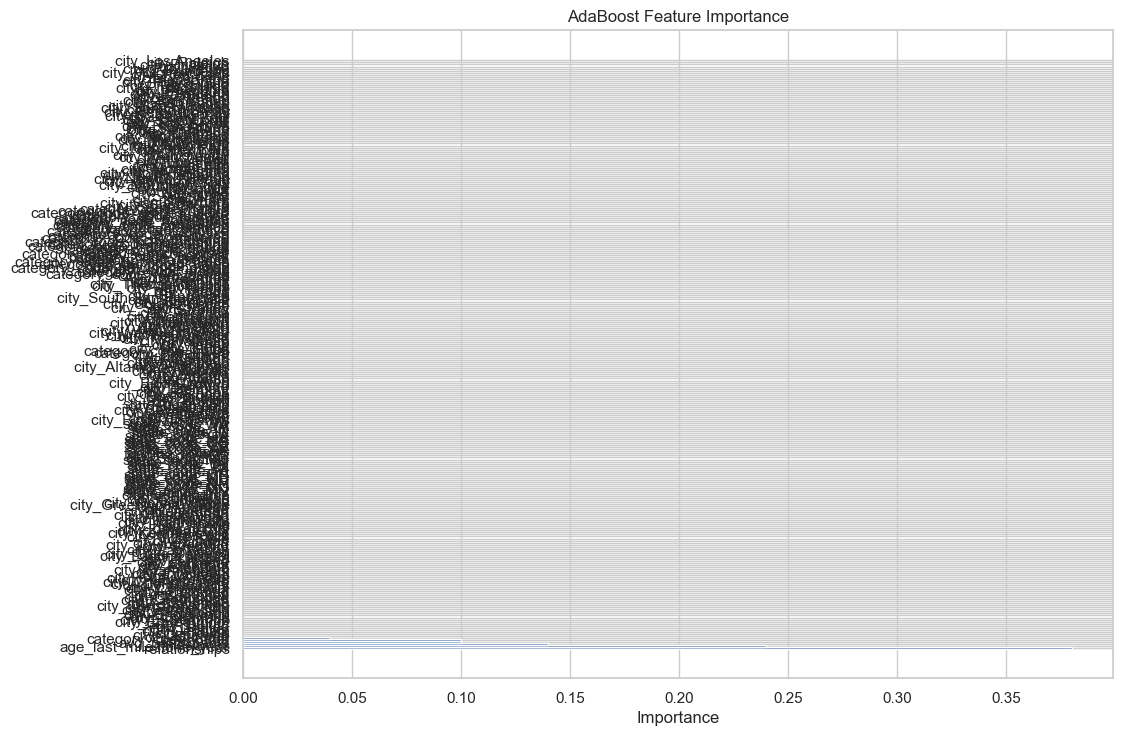

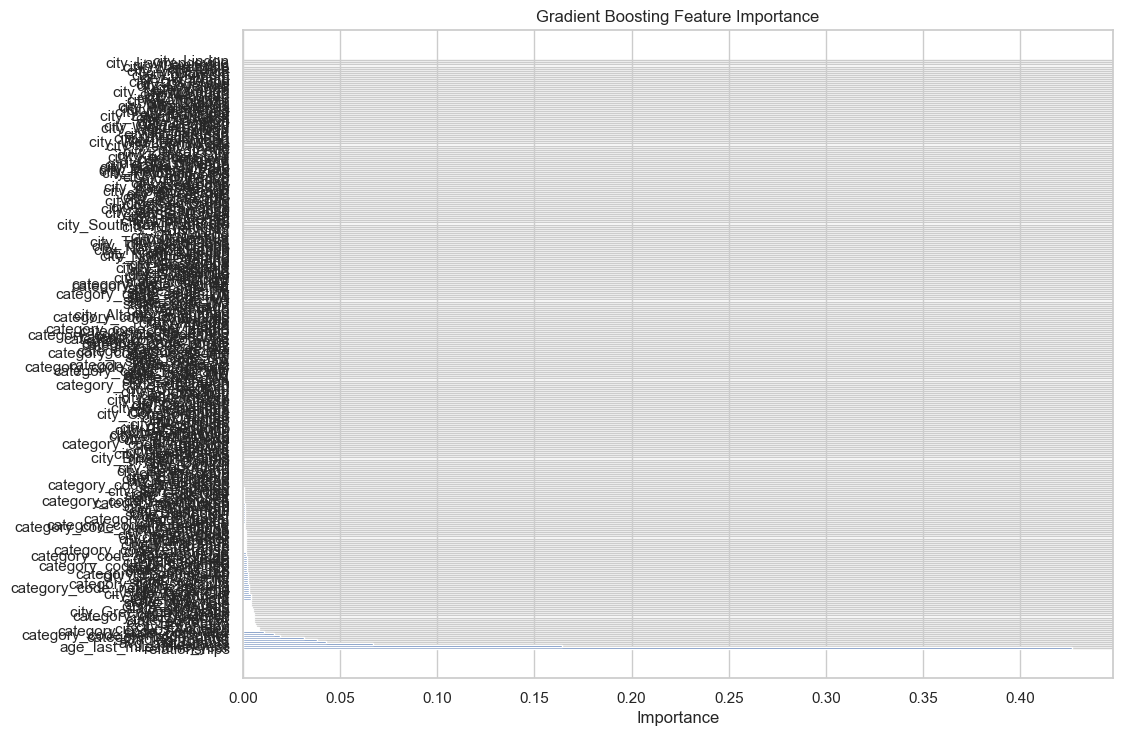

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Assuming df is already defined and properly loaded
y = df["is_acquired"]
X = df.loc[:, df.columns != 'is_acquired']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cross validate model with Kfold stratified cross-validation
kfold = StratifiedKFold(n_splits=10)

# Modeling step: Test different algorithms
random_state = 2
classifiers = [
    SVC(random_state=random_state),
    DecisionTreeClassifier(random_state=random_state),
    AdaBoostClassifier(learning_rate=0.1, n_estimators=50, random_state=random_state),  # Corrected AdaBoost
    RandomForestClassifier(random_state=random_state),
    ExtraTreesClassifier(random_state=random_state),
    GradientBoostingClassifier(random_state=random_state),
    MLPClassifier(random_state=random_state),
    KNeighborsClassifier(),
    LogisticRegression(random_state=random_state),
    LinearDiscriminantAnalysis()
]

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y=y_train, scoring="accuracy", cv=kfold, n_jobs=-1))

cv_means = [result.mean() for result in cv_results]
cv_std = [result.std() for result in cv_results]

cv_res = pd.DataFrame({
    "CrossValMeans": cv_means,
    "CrossValErrors": cv_std,
    "Algorithm": [
        "SVC", "DecisionTree", "AdaBoost", "RandomForest", "ExtraTrees",
        "GradientBoosting", "MLP", "KNeighbors", "LogisticRegression", "LDA"
    ]
})

# Plotting the results
plt.figure(figsize=(12, 8))
g = sns.barplot(data=cv_res, y="Algorithm", x="CrossValMeans", palette="Set3", ci=None)  # ci=None to remove built-in error bars

# Adding error bars manually and labels
for i, row in cv_res.iterrows():
    plt.errorbar(row["CrossValMeans"], i, xerr=row["CrossValErrors"], fmt='o', color='black')
    # Annotate with the mean accuracy value
    plt.text(row["CrossValMeans"] + row["CrossValErrors"], i, f'{row["CrossValMeans"]:.2f}', 
             va='center', ha='left', fontsize=12, color='black')

g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")
plt.show()

# Define and train the models for feature importances
rf = RandomForestClassifier(random_state=42)
et = ExtraTreesClassifier(random_state=42)
ada = AdaBoostClassifier(learning_rate=0.1, n_estimators=50, random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Train models
rf.fit(X_train, y_train)
et.fit(X_train, y_train)
ada.fit(X_train, y_train)
gb.fit(X_train, y_train)



In [89]:
rf_feature = rf.feature_importances_
et_feature = et.feature_importances_
ada_feature = ada.feature_importances_
gb_feature = gb.feature_importances_

# Create a DataFrame for feature importances
feature_dataframe = pd.DataFrame({
    'features': X_train.columns,
    'Random Forest feature importances': rf_feature,
    'Extra Trees feature importances': et_feature,
    'AdaBoost feature importances': ada_feature,
    'Gradient Boost feature importances': gb_feature
})

# Drop rows with NaN values in feature importances
feature_dataframe = feature_dataframe.dropna()

# Function to plot top 10 feature importances using Plotly
def plotly_scatterplots(model_importances, model_title):
    # Get top 10 features
    top_features = feature_dataframe.nlargest(10, model_importances)
    
    trace = go.Scatter(
        y = top_features[model_importances].values,
        x = top_features['features'].values,
        mode='markers',
        marker=dict(
            sizemode='diameter',
            sizeref=1,
            size=25,
            color=top_features[model_importances].values,
            colorscale='Portland',
            showscale=True
        ),
        text=top_features['features'].values
    )
    
    data = [trace]

    layout = go.Layout(
        autosize=True,
        title=model_title,
        hovermode='closest',
        xaxis=dict(
            title='Features',
            ticklen=5,
            gridwidth=2
        ),
        yaxis=dict(
            title='Feature Importance',
            ticklen=5,
            gridwidth=2
        ),
        showlegend=False
    )
    
    fig = go.Figure(data=data, layout=layout)
    fig.show()

# Model names and titles
model_importances = [
    'Random Forest feature importances',
    'Extra Trees feature importances',
    'AdaBoost feature importances',
    'Gradient Boost feature importances'
]

model_titles = [
    'Top 10 Random Forest Feature Importances',
    'Top 10 Extra Trees Feature Importances',
    'Top 10 AdaBoost Feature Importances',
    'Top 10 Gradient Boosting Feature Importances'
]

# Plot top 10 feature importances for each model
for importances, title in zip(model_importances, model_titles):
    plotly_scatterplots(importances, title)

In [91]:

# Ensure that only numeric columns are included for computing the mean
numeric_feature_dataframe = feature_dataframe.select_dtypes(include=[np.number])

# Compute the mean across rows
feature_dataframe['mean'] = numeric_feature_dataframe.mean(axis=1)

# Display the DataFrame
print(feature_dataframe.head(3))

          features          Random Forest feature importances  \
0  age_last_milestone_year              0.130094                
1            relationships              0.178685                
2           funding_rounds              0.055050                

   Extra Trees feature importances  AdaBoost feature importances  \
0             0.085513                          0.24               
1             0.109608                          0.38               
2             0.050473                          0.00               

   Gradient Boost feature importances    mean    
0               0.164383               0.154998  
1               0.426319               0.273653  
2               0.031539               0.034265  


In [97]:
import plotly.graph_objs as go
import plotly.offline as pyo

def mean_bar_plot(feature_dataframe):
    # Sort the dataframe by the mean feature importance values and select the top 10
    top_features = feature_dataframe.nlargest(10, 'mean')

    # Extract values for plotting
    y = top_features['mean'].values
    x = top_features['features'].values
    
    data = [go.Bar(
                x=x,
                y=y,
                width=0.5,
                marker=dict(
                    color=y,
                    colorscale='Portland',
                    showscale=True,
                    reversescale=False
                ),
                opacity=0.6
            )]

    layout = go.Layout(
        autosize=True,
        title='Top 10 Barplots of Mean Feature Importance',
        hovermode='closest',
        yaxis=dict(
            title='Feature Importance',
            ticklen=5,
            gridwidth=2
        ),
        showlegend=False
    )
    
    fig = go.Figure(data=data, layout=layout)
    pyo.iplot(fig, filename='top10-bar-direct-labels')

# Assuming feature_dataframe is already defined
mean_bar_plot(feature_dataframe)


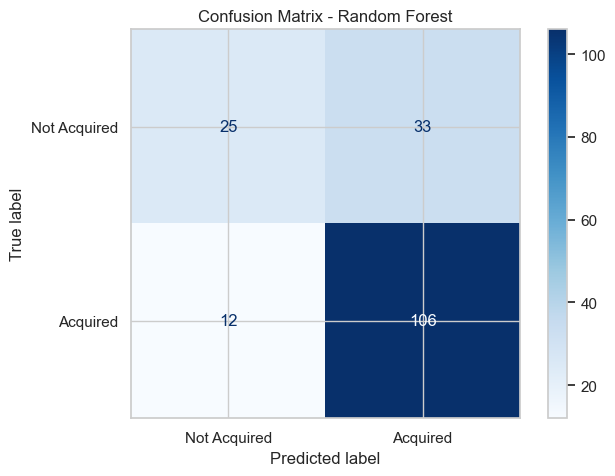

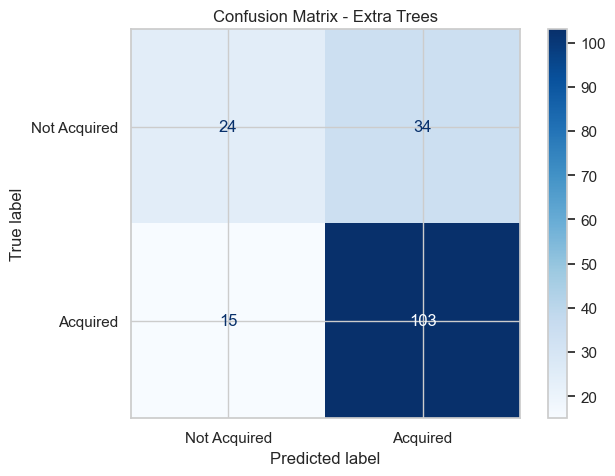

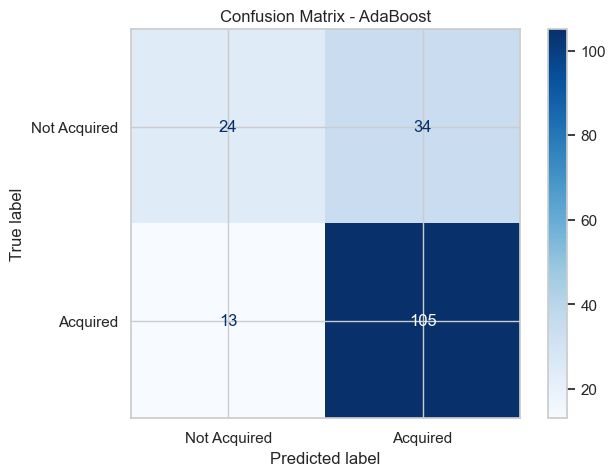

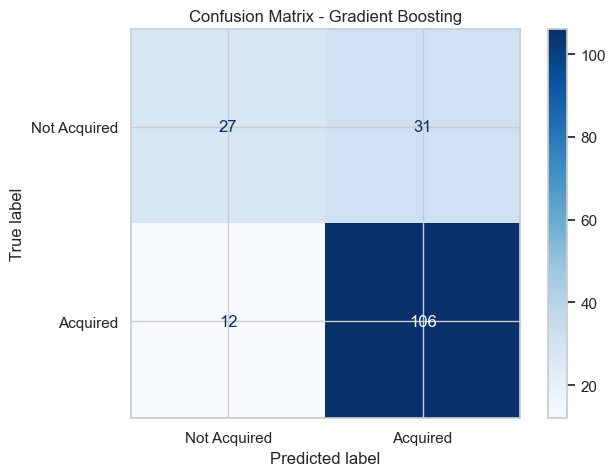

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions on the test set
rf_predictions = rf.predict(X_test)
et_predictions = et.predict(X_test)
ada_predictions = ada.predict(X_test)
gb_predictions = gb.predict(X_test)

# Compute confusion matrices
rf_cm = confusion_matrix(y_test, rf_predictions)
et_cm = confusion_matrix(y_test, et_predictions)
ada_cm = confusion_matrix(y_test, ada_predictions)
gb_cm = confusion_matrix(y_test, gb_predictions)

# Plot confusion matrices
def plot_confusion_matrix(cm, title):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Acquired', 'Acquired'])
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(title)
    plt.show()

# Titles for the confusion matrices
titles = [
    'Confusion Matrix - Random Forest',
    'Confusion Matrix - Extra Trees',
    'Confusion Matrix - AdaBoost',
    'Confusion Matrix - Gradient Boosting'
]

# Plot confusion matrices
for cm, title in zip([rf_cm, et_cm, ada_cm, gb_cm], titles):
    plot_confusion_matrix(cm, title)


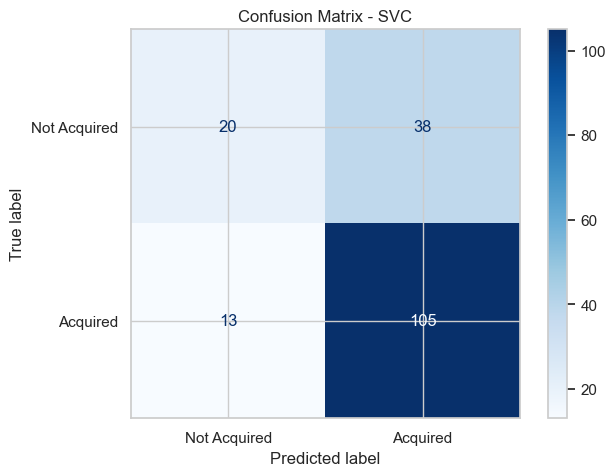

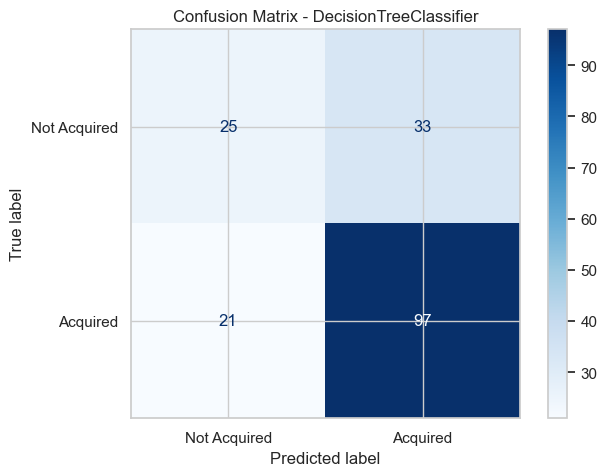

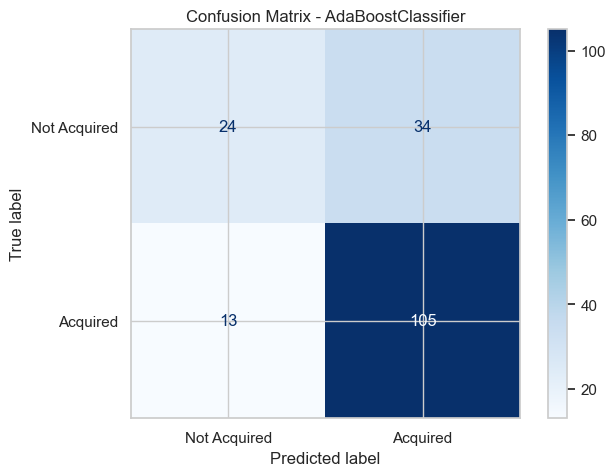

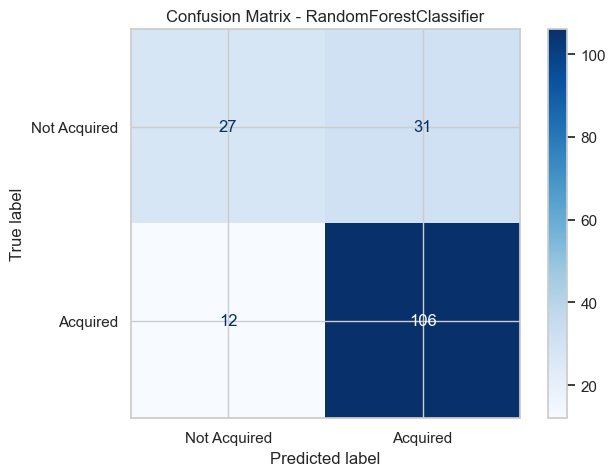

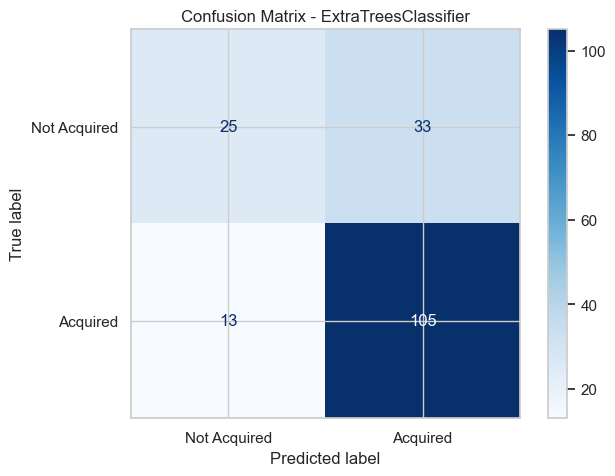

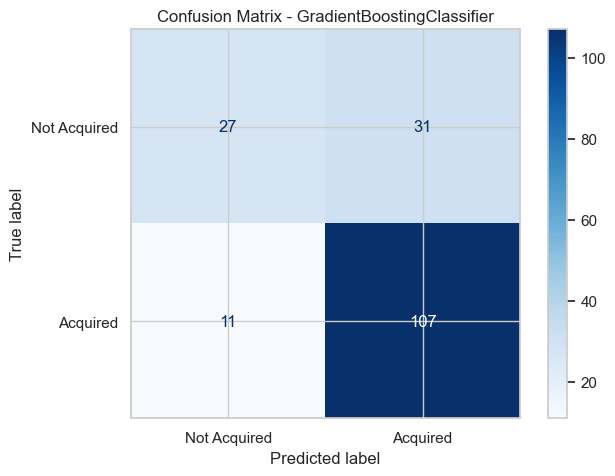

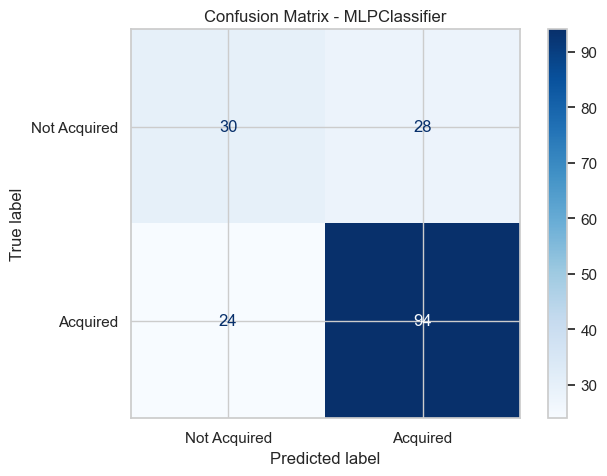

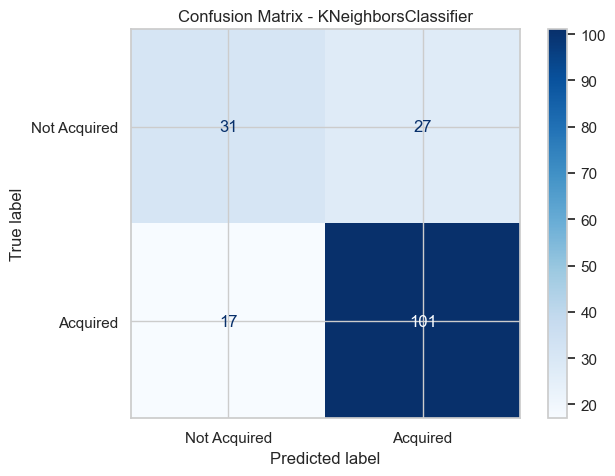

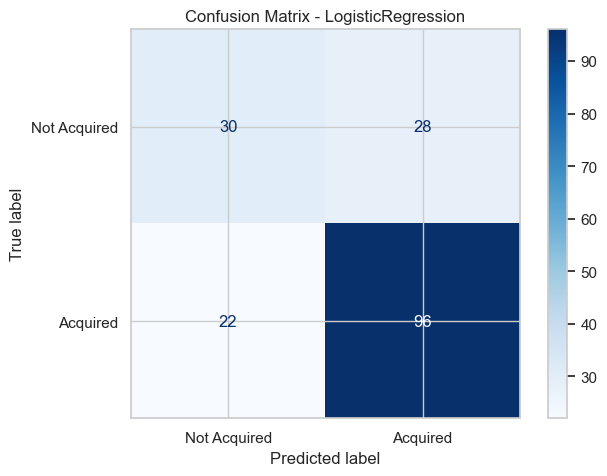

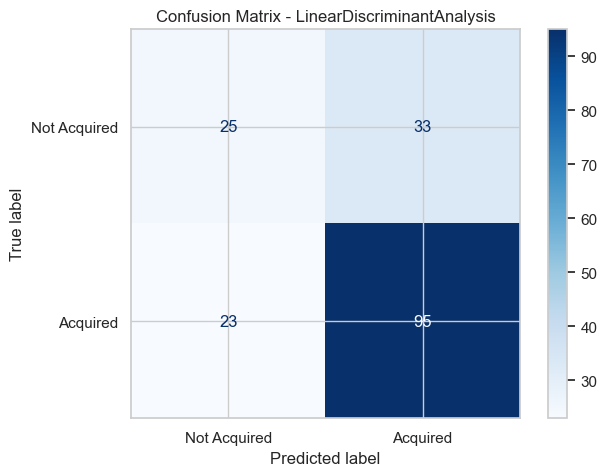

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Dictionary to store confusion matrices
confusion_matrices = {}

# Train and evaluate each classifier
for clf in classifiers:
    # Fit the model
    clf_name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Store the confusion matrix
    confusion_matrices[clf_name] = cm

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Acquired', 'Acquired'])
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(title)
    plt.show()

# Plot confusion matrices for each model
for model_name, cm in confusion_matrices.items():
    plot_confusion_matrix(cm, f'Confusion Matrix - {model_name}')


              features            coefficients  odds_ratios
94                city_Cupertino    1.007468     2.738658  
76                city_Cambridge    1.003387     2.727503  
31                 state_code_OR    0.938128     2.555195  
190                city_Portland    0.938128     2.555195  
170               city_Nashville    0.920470     2.510469  
173                city_New York    0.873108     2.394341  
226               city_Sunnyvale    0.869770     2.386361  
289         category_code_travel    0.816903     2.263479  
6                      is_top500    0.756225     2.130219  
34                 state_code_TN    0.734950     2.085377  
77                 city_Campbell    0.710165     2.034327  
188              city_Pleasanton    0.695602     2.004916  
257      category_code_analytics    0.685880     1.985518  
124                  city_Irvine    0.649175     1.913961  
118                 city_Herndon    0.636348     1.889567  
114       city_Greenwood Village    0.63

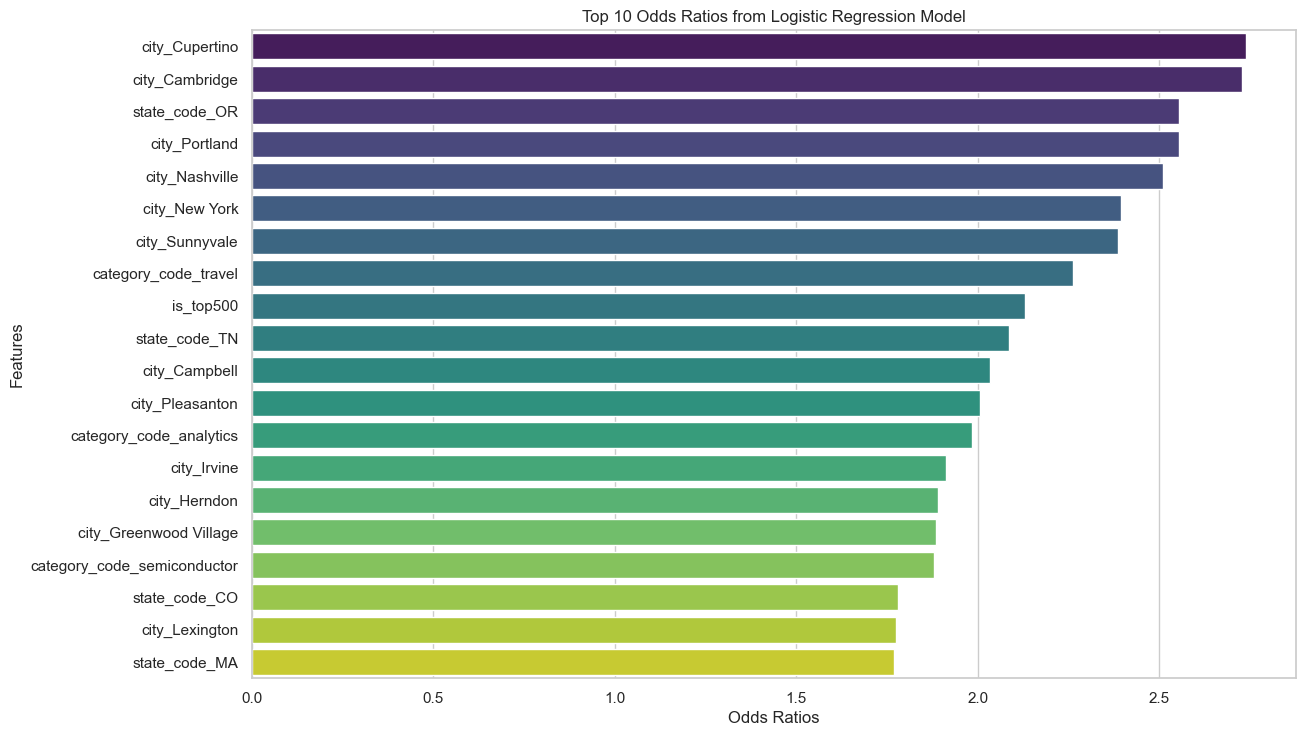

In [158]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming df is already defined and properly loaded
y = df["is_acquired"]
X = df.loc[:, df.columns != 'is_acquired']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
lr = LogisticRegression(random_state=42, max_iter=10000)
lr.fit(X_train, y_train)

# Get the coefficients and compute odds ratios
coefficients = lr.coef_[0]
odds_ratios = np.exp(coefficients)

# Create a DataFrame for the odds ratios
odds_ratio_df = pd.DataFrame({
    'features': X_train.columns,
    'coefficients': coefficients,
    'odds_ratios': odds_ratios
})

# Sort by odds_ratios in descending order and select top 10
top_10_odds_ratio_df = odds_ratio_df.sort_values(by='odds_ratios', ascending=False).head(20)

# Display the DataFrame
print(top_10_odds_ratio_df)

# Plot the odds ratios for top 10 features
plt.figure(figsize=(12, 8))
sns.barplot(x='odds_ratios', y='features', data=top_10_odds_ratio_df, palette='viridis')
plt.xlabel('Odds Ratios')
plt.ylabel('Features')
plt.title('Top 10 Odds Ratios from Logistic Regression Model')
plt.show()
